# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã —Å—Ç–∞–ª–∏ –≤–æ –≤—Ä–µ–º—è –ø–ª–∞–≤–∫–∏

## 1. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑

### 1.1 –ó–∞–≥—Ä—É–∑–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫, —É—Å—Ç–∞–Ω–æ–≤–∫–∏ –∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏

In [117]:
!pip install shap
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.4/1.4 MB 2.5 MB/s eta 0:00:00


In [118]:
#–∏–º–ø–æ—Ä—Ç—ã
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import shap


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import linear_model


from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor as LGBR
from xgboost import XGBRegressor as XGBR
from mlxtend.regressor import StackingCVRegressor


warnings.filterwarnings('ignore')

In [121]:
#–¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏
local_dir = '/datasets/'
pc_dir = 'C:/Users/Mi/Desktop/dfs_proj/'
#Random state
RANDOM_SEED = 280823

### 1.2 –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

#### 1.2.1 –î–∞–Ω–Ω—ã–µ —ç–ª–µ–∫—Ç—Ä–æ–¥–æ–≤

In [4]:
#–∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö —Å —ç–ª–µ–∫—Ç—Ä–æ–¥–æ–≤
try:
    data_arc = pd.read_csv(local_dir + 'data_arc_new.csv')
except:
    data_arc = pd.read_csv(pc_dir + 'data_arc_new.csv')
data_arc

key –ù–∞—á–∞–ª–æ –Ω–∞–≥—Ä–µ–≤–∞ –¥—É–≥–æ–π  –ö–æ–Ω–µ—Ü –Ω–∞–≥—Ä–µ–≤–∞ –¥—É–≥–æ–π  –ê–∫—Ç–∏–≤–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å  \
0         1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.305130   
1         1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.765658   
2         1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.580313   
3         1  2019-05-03 11:18:14  2019-05-03 11:24:19           0.518496   
4         1  2019-05-03 11:26:09  2019-05-03 11:28:37           0.867133   
...     ...                  ...                  ...                ...   
14871  3241  2019-09-06 16:49:05  2019-09-06 16:51:42           0.439735   
14872  3241  2019-09-06 16:55:11  2019-09-06 16:58:11           0.646498   
14873  3241  2019-09-06 17:06:48  2019-09-06 17:09:52           1.039726   
14874  3241  2019-09-06 17:21:58  2019-09-06 17:22:55           0.530267   
14875  3241  2019-09-06 17:24:54  2019-09-06 17:26:15           0.389057   

       –†–µ–∞–∫—Ç–∏–≤–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å  
0                 0.211253  
1                 0.477438  
2                 0.430460  
3                 0.379979  
4                 0.643691  
...                    ...  
14871             0.299579  
14872             0.458240  
14873             0.769302  
14874             0.361543  
14875             0.251347  

[14876 rows x 5 columns]

In [5]:
#–ø—Ä–∏–≤–µ–¥–µ–º –Ω–∞–∑–≤–∞–Ω–∏—è –∫–æ–ª–æ–Ω–æ–∫ –≤ —É–¥–æ–±–Ω—ã–π –≤–∏–¥
data_arc.columns = ['key', 'start_heating', 'end_heating', 'active_power', 'reactive_power']

In [6]:
#–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             14876 non-null  int64  
 1   start_heating   14876 non-null  object 
 2   end_heating     14876 non-null  object 
 3   active_power    14876 non-null  float64
 4   reactive_power  14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ.
–î–∞—Ç—ã —Å–æ–¥–µ—Ä–∂–∞—Ç –Ω–µ–≤–µ—Ä–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç - object. –î–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –ø–µ—Ä–µ–≤–µ–¥–µ–º –∏—Ö –∫ datetime.

In [7]:
#–ø–µ—Ä–µ–≤–æ–¥ —Å—Ç–æ–ª–±—Ü–æ–≤ –∫ —Ñ–æ—Ä–º–∞—Ç—É dt
data_arc.start_heating = pd.to_datetime(data_arc.start_heating)
data_arc.end_heating = pd.to_datetime(data_arc.end_heating)

In [8]:
data_arc.describe()

key  active_power  reactive_power
count  14876.000000  14876.000000    14876.000000
mean    1615.220422      0.662752        0.438986
std      934.571502      0.258885        5.873485
min        1.000000      0.223120     -715.479924
25%      806.000000      0.467115        0.337175
50%     1617.000000      0.599587        0.441639
75%     2429.000000      0.830070        0.608201
max     3241.000000      1.463773        1.270284

–í –¥–∞–Ω–Ω—ã—Ö –∑–∞–º–µ—Ç–Ω—ã –≤—ã–±—Ä–æ—Å—ã –≤ –∫–æ–ª–æ–Ω–∫–∞—Ö active_power –∏ reactive_power. –ü—Ä–∏ —ç—Ç–æ–º –≤ reactive_power –µ—Å—Ç—å —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ = -715

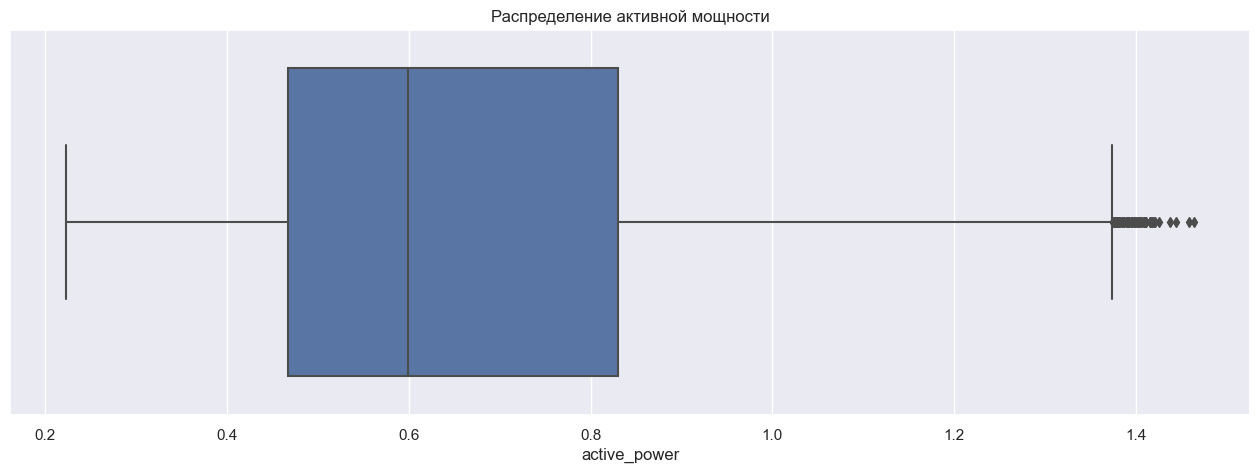

In [9]:
sns.set(rc={'figure.figsize':(16, 5)})
sns.boxplot(x=data_arc['active_power']).set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∞–∫—Ç–∏–≤–Ω–æ–π –º–æ—â–Ω–æ—Å—Ç–∏');

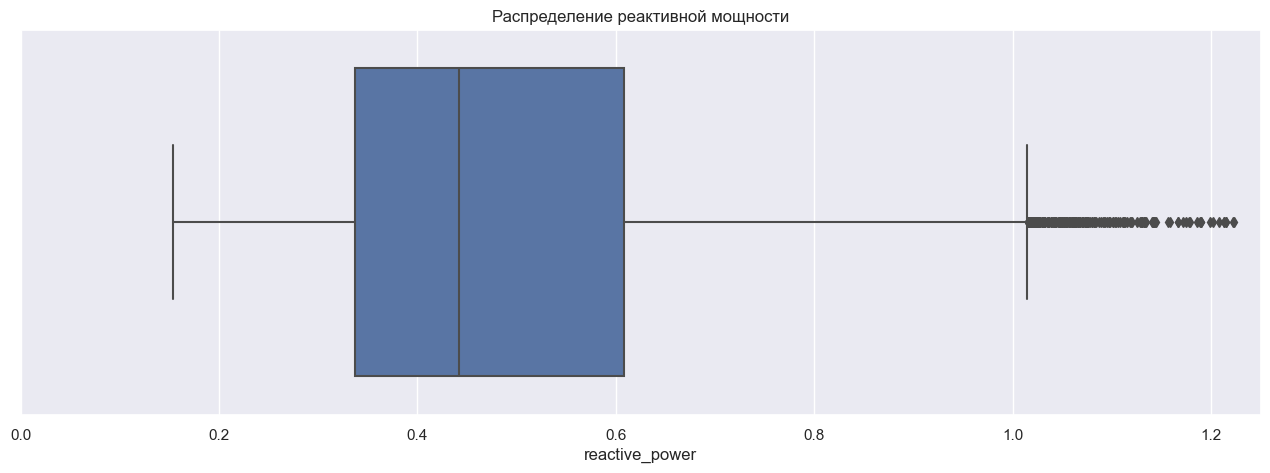

In [10]:
sns.boxplot(x=data_arc.reactive_power).set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–µ–∞–∫—Ç–∏–≤–Ω–æ–π –º–æ—â–Ω–æ—Å—Ç–∏');
plt.xlim(0, 1.25);

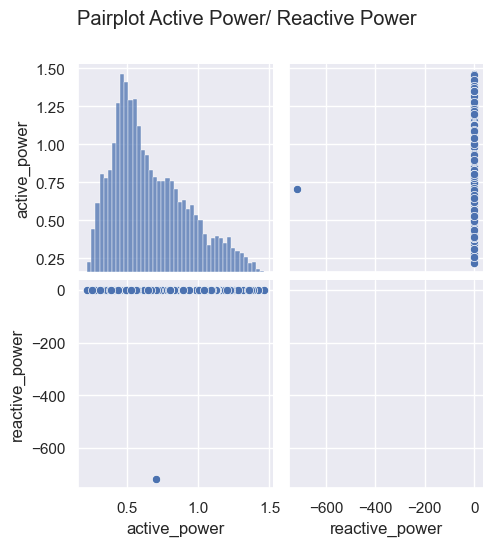

In [11]:
#–ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ø–∞—Ä–Ω–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã –∞–∫—Ç–∏–≤–Ω–æ–π –∏ —Ä–µ–∞–∫—Ç–∏–≤–Ω–æ–π –º–æ—â–Ω–æ—Å—Ç–µ–π
g = sns.pairplot(data_arc[['active_power', 'reactive_power']])
g.fig.suptitle("Pairplot Active Power/ Reactive Power", y=1.08);

–ü—Ä–∏–∑–Ω–∞–∫–∏ active_power –∏ reactive_power —Å–∏–ª—å–Ω–æ —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω—ã. –í–∏–¥–µ–Ω —è–≤–Ω—ã–π –≤—ã–±—Ä–æ—Å –≤ –¥–∞–Ω–Ω—ã—Ö.

#### 1.2.2 –î–∞–Ω–Ω—ã–µ –æ –ø–æ–¥–∞—á–µ —Å—ã–ø—É—á–∏—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤

In [12]:
#–∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
try:
    data_bulk = pd.read_csv(local_dir + 'data_bulk_new.csv')
except:
    data_bulk = pd.read_csv(pc_dir + 'data_bulk_new.csv')
data_bulk

key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0        1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1        2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2        3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
3        4     NaN     NaN     NaN    81.0     NaN     NaN     NaN     NaN   
4        5     NaN     NaN     NaN    78.0     NaN     NaN     NaN     NaN   
...    ...     ...     ...     ...     ...     ...     ...     ...     ...   
3124  3237     NaN     NaN   170.0     NaN     NaN     NaN     NaN     NaN   
3125  3238     NaN     NaN   126.0     NaN     NaN     NaN     NaN     NaN   
3126  3239     NaN     NaN     NaN     NaN     NaN   114.0     NaN     NaN   
3127  3240     NaN     NaN     NaN     NaN     NaN    26.0     NaN     NaN   
3128  3241     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
0        NaN      NaN      NaN    206.0      NaN    150.0    154.0  
1        NaN      NaN      NaN    206.0      NaN    149.0    154.0  
2        NaN      NaN      NaN    205.0      NaN    152.0    153.0  
3        NaN      NaN      NaN    207.0      NaN    153.0    154.0  
4        NaN      NaN      NaN    203.0      NaN    151.0    152.0  
...      ...      ...      ...      ...      ...      ...      ...  
3124     NaN      NaN      NaN    252.0      NaN    130.0    206.0  
3125     NaN      NaN      NaN    254.0      NaN    108.0    106.0  
3126     NaN      NaN      NaN    158.0      NaN    270.0     88.0  
3127     NaN      NaN      NaN      NaN      NaN    192.0     54.0  
3128     NaN      NaN      NaN      NaN      NaN    180.0     52.0  

[3129 rows x 16 columns]

In [13]:
#–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


–ù–∞–±–ª—é–¥–∞–µ—Ç—Å—è –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–æ–ª—é –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ.

In [14]:
(data_bulk.isna().mean().to_frame()
 .rename(columns={0: '–î–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö'}).sort_values('–î–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö', ascending=False)
)

–î–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö
Bulk 8                  0.999680
Bulk 13                 0.994247
Bulk 9                  0.993928
Bulk 2                  0.992969
Bulk 7                  0.992010
Bulk 5                  0.975391
Bulk 10                 0.943752
Bulk 11                 0.943432
Bulk 1                  0.919463
Bulk 6                  0.815916
Bulk 4                  0.675935
Bulk 3                  0.585171
Bulk 15                 0.281560
Bulk 12                 0.217002
Bulk 14                 0.103228
key                     0.000000

In [15]:
data_bulk.describe()

key      Bulk 1      Bulk 2       Bulk 3       Bulk 4  \
count  3129.000000  252.000000   22.000000  1298.000000  1014.000000   
mean   1624.383509   39.242063  253.045455   113.879045   104.394477   
std     933.337642   18.277654   21.180578    75.483494    48.184126   
min       1.000000   10.000000  228.000000     6.000000    12.000000   
25%     816.000000   27.000000  242.000000    58.000000    72.000000   
50%    1622.000000   31.000000  251.500000    97.500000   102.000000   
75%    2431.000000   46.000000  257.750000   152.000000   133.000000   
max    3241.000000  185.000000  325.000000   454.000000   281.000000   

           Bulk 5      Bulk 6      Bulk 7  Bulk 8      Bulk 9     Bulk 10  \
count   77.000000  576.000000   25.000000     1.0   19.000000  176.000000   
mean   107.025974  118.925347  305.600000    49.0   76.315789   83.284091   
std     81.790646   72.057776  191.022904     NaN   21.720581   26.060347   
min     11.000000   17.000000   47.000000    49.0   63.000000   24.000000   
25%     70.000000   69.750000  155.000000    49.0   66.000000   64.000000   
50%     86.000000  100.000000  298.000000    49.0   68.000000   86.500000   
75%    132.000000  157.000000  406.000000    49.0   70.500000  102.000000   
max    603.000000  503.000000  772.000000    49.0  147.000000  159.000000   

          Bulk 11      Bulk 12     Bulk 13      Bulk 14      Bulk 15  
count  177.000000  2450.000000   18.000000  2806.000000  2248.000000  
mean    76.819209   260.471020  181.111111   170.284747   160.513345  
std     59.655365   120.649269   46.088009    65.868652    51.765319  
min      8.000000    53.000000  151.000000    16.000000     1.000000  
25%     25.000000   204.000000  153.250000   119.000000   105.000000  
50%     64.000000   208.000000  155.500000   151.000000   160.000000  
75%    106.000000   316.000000  203.500000   205.750000   205.000000  
max    313.000000  1849.000000  305.000000   636.000000   405.000000

–ü–æ—Å–ª–µ –ø–µ—Ä–≤–∏—á–Ω–æ–≥–æ EDA –∫–æ–ª–æ–Ω–∫–∏ —Å –±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º—ã —É–¥–∞–ª–∏–º –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞.

#### 1.2.3 –î–∞–Ω–Ω—ã–µ –æ –ø–æ–¥–∞—á–µ —Å—ã–ø—É—á–∏—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤ (–≤—Ä–µ–º—è);

In [16]:
#–∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
try:
    data_bulk_time = pd.read_csv(local_dir + 'data_bulk_time_new.csv')
except:
    data_bulk_time = pd.read_csv(pc_dir + 'data_bulk_time_new.csv')
data_bulk_time.head()

key Bulk 1 Bulk 2 Bulk 3               Bulk 4 Bulk 5 Bulk 6 Bulk 7 Bulk 8  \
0    1    NaN    NaN    NaN  2019-05-03 11:28:48    NaN    NaN    NaN    NaN   
1    2    NaN    NaN    NaN  2019-05-03 11:36:50    NaN    NaN    NaN    NaN   
2    3    NaN    NaN    NaN  2019-05-03 12:32:39    NaN    NaN    NaN    NaN   
3    4    NaN    NaN    NaN  2019-05-03 12:43:22    NaN    NaN    NaN    NaN   
4    5    NaN    NaN    NaN  2019-05-03 13:30:47    NaN    NaN    NaN    NaN   

  Bulk 9 Bulk 10 Bulk 11              Bulk 12 Bulk 13              Bulk 14  \
0    NaN     NaN     NaN  2019-05-03 11:24:31     NaN  2019-05-03 11:14:50   
1    NaN     NaN     NaN  2019-05-03 11:53:30     NaN  2019-05-03 11:48:37   
2    NaN     NaN     NaN  2019-05-03 12:27:13     NaN  2019-05-03 12:21:01   
3    NaN     NaN     NaN  2019-05-03 12:58:00     NaN  2019-05-03 12:51:11   
4    NaN     NaN     NaN  2019-05-03 13:30:47     NaN  2019-05-03 13:34:12   

               Bulk 15  
0  2019-05-03 11:10:43  
1  2019-05-03 11:44:39  
2  2019-05-03 12:16:16  
3  2019-05-03 12:46:36  
4  2019-05-03 13:30:47

–ü–µ—Ä–µ–¥ –Ω–∞–º–∏ –≤—Ä–µ–º–µ–Ω–∞ –ø–æ–¥–∞—á–∏ —Å—ã–ø—É—á–∏—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤.

In [17]:
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


–ü—Ä–æ–ø—É—Å–∫–∏ –≤ —Ç–µ—Ö –∂–µ —è—á–µ–π–∫–∞—Ö, –≥–¥–µ –∏ –≤ data_bulk.

–í—ã–≤–µ–¥–µ–º –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–µ –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–µ –¥–∞—Ç—ã –ø–æ –∫–∞–∂–¥–æ–π –∫–æ–ª–æ–Ω–∫–µ, —á—Ç–æ–±—ã –æ—Ü–µ–Ω–∏—Ç—å, –Ω–µ—Ç –ª–∏ –≤—ã–±–∏–≤–∞—é—â–∏—Ö—Å—è –∑–Ω–∞—á–µ–Ω–∏–π.

In [18]:
data_bulk_time.drop(['key'], axis=1).apply(pd.to_datetime).min()

Bulk 1    2019-05-03 17:42:46
Bulk 2    2019-05-07 15:39:35
Bulk 3    2019-05-03 20:40:25
Bulk 4    2019-05-03 11:28:48
Bulk 5    2019-05-07 15:19:17
Bulk 6    2019-05-03 19:09:15
Bulk 7    2019-05-07 18:11:01
Bulk 8    2019-07-08 17:14:53
Bulk 9    2019-05-14 11:57:58
Bulk 10   2019-05-06 07:54:02
Bulk 11   2019-05-05 23:43:24
Bulk 12   2019-05-03 11:24:31
Bulk 13   2019-05-05 02:10:21
Bulk 14   2019-05-03 11:14:50
Bulk 15   2019-05-03 11:10:43
dtype: datetime64[ns]

In [19]:
data_bulk_time.drop(['key'], axis=1).apply(pd.to_datetime).max()

Bulk 1    2019-09-05 09:11:32
Bulk 2    2019-08-13 11:47:39
Bulk 3    2019-09-06 12:26:52
Bulk 4    2019-09-05 03:35:21
Bulk 5    2019-09-02 18:16:52
Bulk 6    2019-09-06 16:24:28
Bulk 7    2019-09-05 19:07:49
Bulk 8    2019-07-08 17:14:53
Bulk 9    2019-08-16 09:11:56
Bulk 10   2019-09-04 10:03:22
Bulk 11   2019-09-06 05:03:14
Bulk 12   2019-09-06 15:01:44
Bulk 13   2019-09-01 01:53:02
Bulk 14   2019-09-06 17:26:33
Bulk 15   2019-09-06 17:23:15
dtype: datetime64[ns]

–ü–æ –≤—Å–µ–π –≤–∏–¥–∏–º–æ—Å—Ç–∏, —Å—Ç—Ä–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–∞—Ç—ã –≤ —Å—ã–ø—É—á–∏—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–∞—Ö –Ω–µ—Ç –∏ –Ω–∞–º —ç—Ç–∏ –¥–∞—Ç—ã –Ω–µ –ø–æ–Ω–∞–¥–æ–±—è—Ç—Å—è –≤ —Ä–∞–±–æ—Ç–µ.

#### 1.2.4 –î–∞–Ω–Ω—ã–µ –æ –ø—Ä–æ–¥—É–≤–∫–µ —Å–ø–ª–∞–≤–∞ –≥–∞–∑–æ–º

In [20]:
#–∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
try:
    data_gas = pd.read_csv(local_dir + 'data_gas_new.csv')
except:
    data_gas = pd.read_csv(pc_dir + 'data_gas_new.csv')
data_gas

key      –ì–∞–∑ 1
0        1  29.749986
1        2  12.555561
2        3  28.554793
3        4  18.841219
4        5   5.413692
...    ...        ...
3234  3237   5.543905
3235  3238   6.745669
3236  3239  16.023518
3237  3240  11.863103
3238  3241  12.680959

[3239 rows x 2 columns]

In [21]:
#–ø—Ä–∏–≤–µ–¥–µ–º –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ –∫ —É–¥–æ–±–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º
data_gas.columns = ['key', 'gas_1']

In [22]:
#–≤—ã–≤–µ–¥–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –¥–∞—Ç–∞—Å–µ—Ç–µ
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas_1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


–ü—Ä–æ–ø—É—Å–∫–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç.

In [23]:
#–ø–æ—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤ –¥–∞–Ω–Ω—ã—Ö
data_gas.describe()

key        gas_1
count  3239.000000  3239.000000
mean   1621.861377    11.002062
std     935.386334     6.220327
min       1.000000     0.008399
25%     812.500000     7.043089
50%    1622.000000     9.836267
75%    2431.500000    13.769915
max    3241.000000    77.995040

–ü—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤—ã–±—Ä–æ—Å—ã –≤ –æ–±–ª–∞—Å—Ç–∏ –≤—ã—Å–æ–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ–¥–∞—á–∏ –≥–∞–∑–∞.

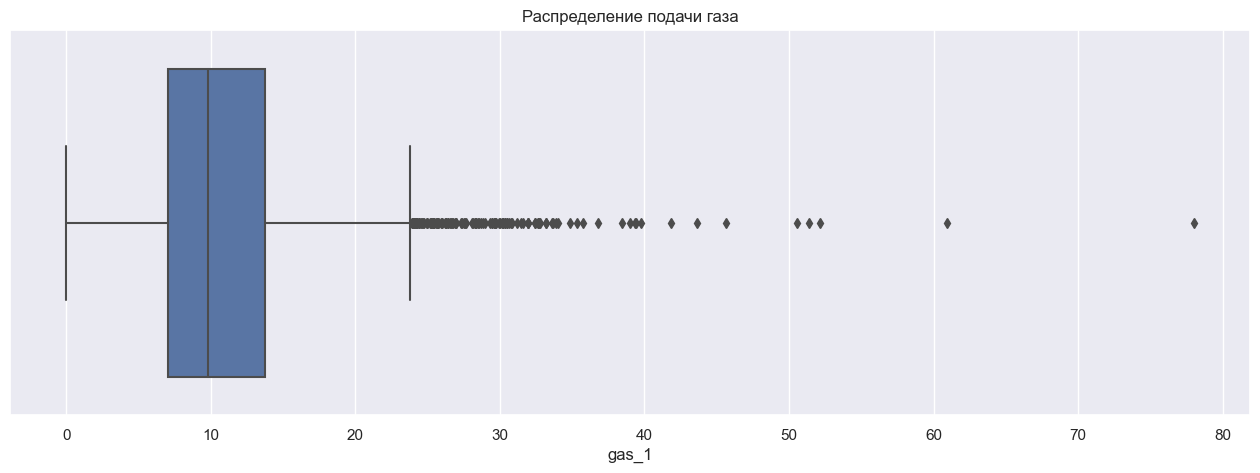

In [24]:
sns.boxplot(x=data_gas['gas_1']).set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–¥–∞—á–∏ –≥–∞–∑–∞');

#### 1.2.5 –î–∞–Ω–Ω—ã–µ —Ç–µ—Ä–º–æ–¥–∞—Ç—á–∏–∫–æ–≤

In [25]:
#–∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
try:
    data_temp = pd.read_csv(local_dir + 'data_temp_new.csv')
except:
    data_temp = pd.read_csv(pc_dir + 'data_temp_new.csv')
data_temp

key         –í—Ä–µ–º—è –∑–∞–º–µ—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0         1  2019-05-03 11:02:04       1571.0
1         1  2019-05-03 11:07:18       1604.0
2         1  2019-05-03 11:11:34       1618.0
3         1  2019-05-03 11:18:04       1601.0
4         1  2019-05-03 11:25:59       1606.0
...     ...                  ...          ...
18087  3241  2019-09-06 16:55:01          NaN
18088  3241  2019-09-06 17:06:38          NaN
18089  3241  2019-09-06 17:21:48          NaN
18090  3241  2019-09-06 17:24:44          NaN
18091  3241  2019-09-06 17:30:05          NaN

[18092 rows x 3 columns]

In [26]:
#–∑–∞–º–µ–Ω–∏–º –Ω–∞–∑–≤–∞–Ω–∏—è –∫–æ–ª–æ–Ω–æ–∫
data_temp.columns = ['key', 'measure_time', 'temp']

In [27]:
#–≤—ã–≤–µ–¥–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ –¥–∞—Ç–∞—Å–µ—Ç—É
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   measure_time  18092 non-null  object 
 2   temp          14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [28]:
#–ø–µ—Ä–µ–≤–µ–¥–µ–º measure_time –∫ —Ç–∏–ø—É datetime
data_temp['measure_time'] = pd.to_datetime(data_temp['measure_time'])

In [29]:
data_temp.isna().mean()

key             0.000000
measure_time    0.000000
temp            0.189421
dtype: float64

–í —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞—Ö –æ–∫–æ–ª–æ 19% –ø—Ä–æ–ø—É—Å–∫–æ–≤.

In [30]:
data_temp.describe()

key          temp
count  18092.000000  14665.000000
mean    1616.460977   1590.722741
std      934.641385     20.394381
min        1.000000   1191.000000
25%      807.750000   1580.000000
50%     1618.000000   1590.000000
75%     2429.000000   1599.000000
max     3241.000000   1705.000000

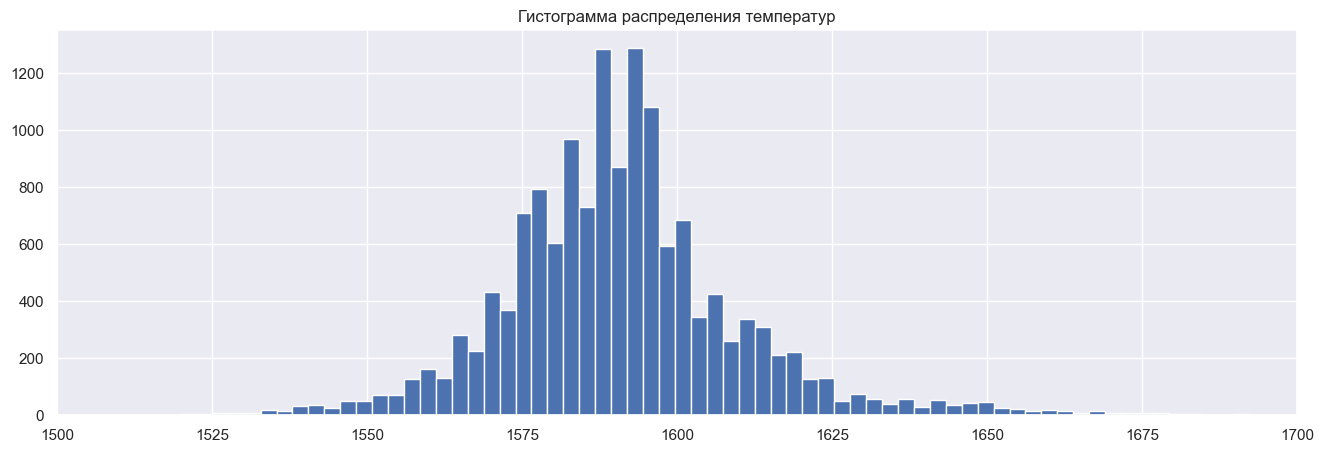

In [31]:
#—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ
data_temp['temp'].hist(bins=200).set_title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä')
plt.xlim(1500, 1700);

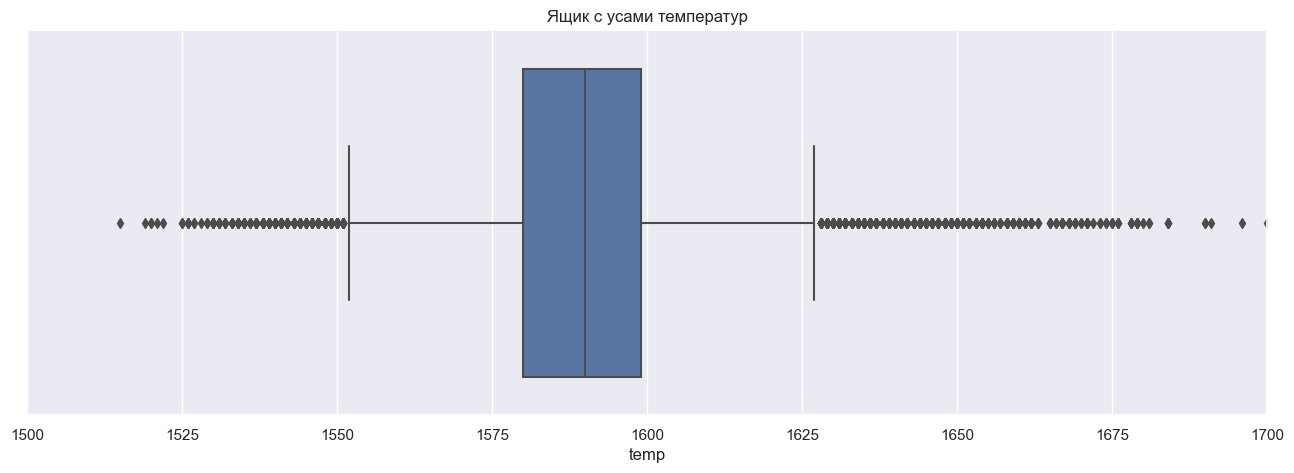

In [32]:
sns.boxplot(x=data_temp.temp).set_title('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä')
plt.xlim(1500, 1700);

–ï—Å—Ç—å –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —è–≤–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö.

–ü–æ —Å–ª–æ–≤–∞–º –∑–∞–∫–∞–∑—á–∏–∫–∞ –≤—Å–µ –¥–∞–Ω–Ω—ã–µ —Å —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–æ–π –º–µ–Ω–µ–µ 1500 –≥—Ä–∞–¥—É—Å–æ–≤ –º–æ–∂–Ω–æ —É–±—Ä–∞—Ç—å - —Ç–∞–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –Ω–µ –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫ –ø—Ä–æ—Ü–µ—Å—Å—É –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Å—Ç–∞–ª–∏.

#### 1.2.6 –î–∞–Ω–Ω—ã–µ –æ –ø–æ–¥–∞—á–µ –ø—Ä–æ–≤–æ–ª–æ—á–Ω—ã—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤

In [33]:
#–∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
try:
    data_wire = pd.read_csv(local_dir + 'data_wire_new.csv')
except:
    data_wire = pd.read_csv(pc_dir + 'data_wire_new.csv')
data_wire

key      Wire 1   Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  \
0        1   60.059998      NaN     NaN     NaN     NaN     NaN     NaN   
1        2   96.052315      NaN     NaN     NaN     NaN     NaN     NaN   
2        3   91.160157      NaN     NaN     NaN     NaN     NaN     NaN   
3        4   89.063515      NaN     NaN     NaN     NaN     NaN     NaN   
4        5   89.238236  9.11456     NaN     NaN     NaN     NaN     NaN   
...    ...         ...      ...     ...     ...     ...     ...     ...   
3076  3237   38.088959      NaN     NaN     NaN     NaN     NaN     NaN   
3077  3238   56.128799      NaN     NaN     NaN     NaN     NaN     NaN   
3078  3239  143.357761      NaN     NaN     NaN     NaN     NaN     NaN   
3079  3240   34.070400      NaN     NaN     NaN     NaN     NaN     NaN   
3080  3241   63.117595      NaN     NaN     NaN     NaN     NaN     NaN   

      Wire 8  Wire 9  
0        NaN     NaN  
1        NaN     NaN  
2        NaN     NaN  
3        NaN     NaN  
4        NaN     NaN  
...      ...     ...  
3076     NaN     NaN  
3077     NaN     NaN  
3078     NaN     NaN  
3079     NaN     NaN  
3080     NaN     NaN  

[3081 rows x 10 columns]

In [34]:
#–ø–æ—Å–º–æ—Ç—Ä–∏–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –¥–∞—Ç–∞—Å–µ—Ç–µ
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


–í–æ –≤—Å–µ—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö –∫—Ä–æ–º–µ Wire 1 –∏ Wire 2 –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤—Å–µ –¥–∞–Ω–Ω—ã–µ —è–≤–ª—è—é—Ç—Å—è –ø—Ä–æ–ø—É—Å–∫–∞–º–∏

In [35]:
(data_wire.isna().mean().to_frame()
 .rename(columns={0: '–î–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö'}).sort_values('–î–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö', ascending=False)
)

–î–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö
Wire 5                 0.999675
Wire 7                 0.996430
Wire 4                 0.995456
Wire 8                 0.993833
Wire 9                 0.990587
Wire 3                 0.979552
Wire 6                 0.976306
Wire 2                 0.649789
Wire 1                 0.008439
key                    0.000000

In [36]:
data_wire.describe()

key       Wire 1       Wire 2      Wire 3      Wire 4  Wire 5  \
count  3081.000000  3055.000000  1079.000000   63.000000   14.000000   1.000   
mean   1623.426485   100.895853    50.577323  189.482681   57.442841  15.132   
std     932.996726    42.012518    39.320216   99.513444   28.824667     NaN   
min       1.000000     1.918800     0.030160    0.144144   24.148801  15.132   
25%     823.000000    72.115684    20.193680   95.135044   40.807002  15.132   
50%    1619.000000   100.158234    40.142956  235.194977   45.234282  15.132   
75%    2434.000000   126.060483    70.227558  276.252014   76.124619  15.132   
max    3241.000000   330.314424   282.780152  385.008668  113.231044  15.132   

           Wire 6     Wire 7      Wire 8     Wire 9  
count   73.000000  11.000000   19.000000  29.000000  
mean    48.016974  10.039007   53.625193  34.155752  
std     33.919845   8.610584   16.881728  19.931616  
min      0.034320   0.234208   45.076721   4.622800  
25%     25.053600   6.762756   46.094879  22.058401  
50%     42.076324   9.017009   46.279999  30.066399  
75%     64.212723  11.886057   48.089603  43.862003  
max    180.454575  32.847674  102.762401  90.053604

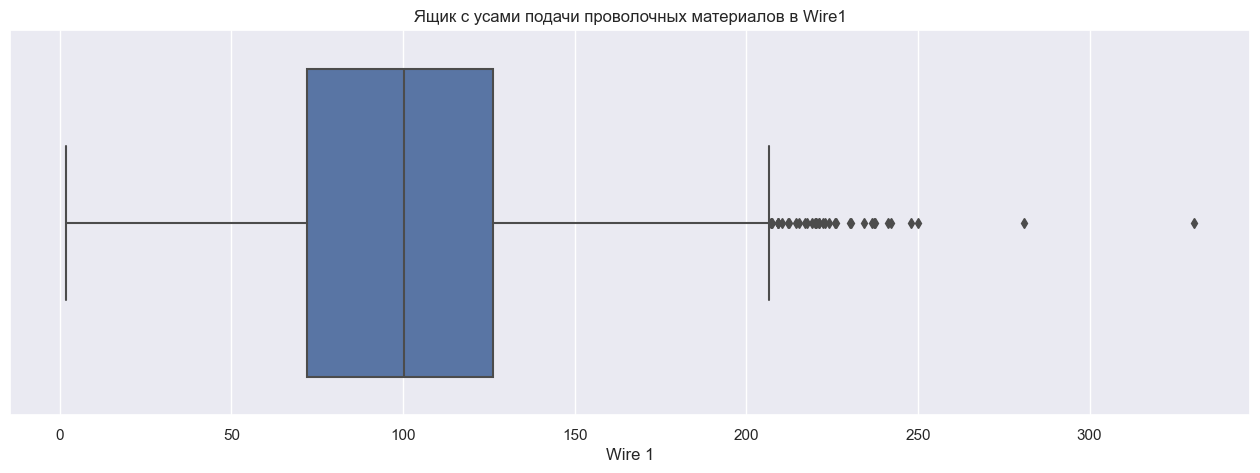

In [37]:
#–≤—ã–±—Ä–æ—Å—ã –≤ Wire1
sns.boxplot(x=data_wire['Wire 1']).set_title('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –ø–æ–¥–∞—á–∏ –ø—Ä–æ–≤–æ–ª–æ—á–Ω—ã—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤ –≤ Wire1');

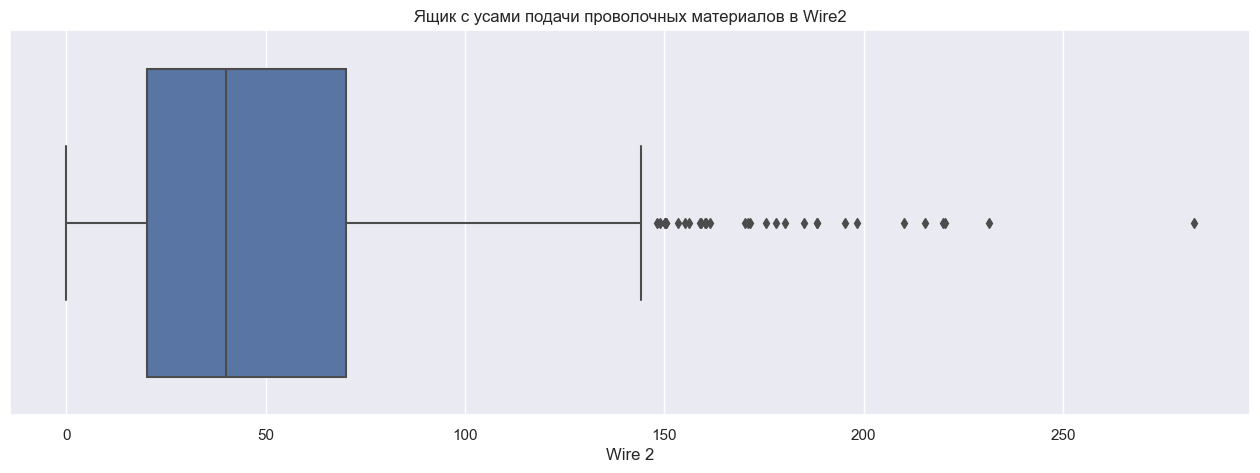

In [38]:
#–≤—ã–±—Ä–æ—Å—ã –≤ Wire1
sns.boxplot(x=data_wire['Wire 2']).set_title('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –ø–æ–¥–∞—á–∏ –ø—Ä–æ–≤–æ–ª–æ—á–Ω—ã—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤ –≤ Wire2');

–í Wire 1 –∏ Wire2 —Ç–∞–∫–∂–µ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤—ã–±—Ä–æ—Å—ã.

In [39]:
data_wire.corr()

key    Wire 1    Wire 2    Wire 3    Wire 4  Wire 5    Wire 6  \
key     1.000000 -0.083352 -0.005461 -0.084460  0.389064     NaN  0.082274   
Wire 1 -0.083352  1.000000 -0.030892  0.724370  0.054001     NaN -0.280807   
Wire 2 -0.005461 -0.030892  1.000000 -0.081852       NaN     NaN -0.265706   
Wire 3 -0.084460  0.724370 -0.081852  1.000000  0.069854     NaN -0.221602   
Wire 4  0.389064  0.054001       NaN  0.069854  1.000000     NaN  0.237456   
Wire 5       NaN       NaN       NaN       NaN       NaN     NaN       NaN   
Wire 6  0.082274 -0.280807 -0.265706 -0.221602  0.237456     NaN  1.000000   
Wire 7  0.578898 -0.035072       NaN -0.056948 -0.404865     NaN -0.224093   
Wire 8  0.323891  0.068697  0.250477       NaN       NaN     NaN       NaN   
Wire 9 -0.012200  0.010104  0.011019       NaN       NaN     NaN       NaN   

          Wire 7    Wire 8    Wire 9  
key     0.578898  0.323891 -0.012200  
Wire 1 -0.035072  0.068697  0.010104  
Wire 2       NaN  0.250477  0.011019  
Wire 3 -0.056948       NaN       NaN  
Wire 4 -0.404865       NaN       NaN  
Wire 5       NaN       NaN       NaN  
Wire 6 -0.224093       NaN       NaN  
Wire 7  1.000000       NaN       NaN  
Wire 8       NaN  1.000000       NaN  
Wire 9       NaN       NaN  1.000000

#### 1.2.7 –î–∞–Ω–Ω—ã–µ –æ –ø–æ–¥–∞—á–µ –ø—Ä–æ–≤–æ–ª–æ—á–Ω—ã—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤ (–≤—Ä–µ–º—è).

In [40]:
#–∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
try:
    data_wire_time = pd.read_csv(local_dir + 'data_wire_time_new.csv')
except:
    data_wire_time = pd.read_csv(pc_dir + 'data_wire_time_new.csv')
data_wire_time

key               Wire 1               Wire 2 Wire 3 Wire 4 Wire 5  \
0        1  2019-05-03 11:06:19                  NaN    NaN    NaN    NaN   
1        2  2019-05-03 11:36:50                  NaN    NaN    NaN    NaN   
2        3  2019-05-03 12:11:46                  NaN    NaN    NaN    NaN   
3        4  2019-05-03 12:43:22                  NaN    NaN    NaN    NaN   
4        5  2019-05-03 13:20:44  2019-05-03 13:15:34    NaN    NaN    NaN   
...    ...                  ...                  ...    ...    ...    ...   
3076  3237  2019-09-06 11:33:38                  NaN    NaN    NaN    NaN   
3077  3238  2019-09-06 12:18:35                  NaN    NaN    NaN    NaN   
3078  3239  2019-09-06 14:36:11                  NaN    NaN    NaN    NaN   
3079  3240  2019-09-06 15:33:55                  NaN    NaN    NaN    NaN   
3080  3241  2019-09-06 17:10:06                  NaN    NaN    NaN    NaN   

     Wire 6 Wire 7 Wire 8 Wire 9  
0       NaN    NaN    NaN    NaN  
1       NaN    NaN    NaN    NaN  
2       NaN    NaN    NaN    NaN  
3       NaN    NaN    NaN    NaN  
4       NaN    NaN    NaN    NaN  
...     ...    ...    ...    ...  
3076    NaN    NaN    NaN    NaN  
3077    NaN    NaN    NaN    NaN  
3078    NaN    NaN    NaN    NaN  
3079    NaN    NaN    NaN    NaN  
3080    NaN    NaN    NaN    NaN  

[3081 rows x 10 columns]

In [41]:
data_wire_time.drop(['key'], axis=1).apply(pd.to_datetime).min()

Wire 1   2019-05-03 11:06:19
Wire 2   2019-05-03 13:15:34
Wire 3   2019-05-04 04:34:27
Wire 4   2019-05-07 15:19:17
Wire 5   2019-08-13 06:14:30
Wire 6   2019-05-07 14:46:05
Wire 7   2019-07-27 05:49:05
Wire 8   2019-05-14 11:29:24
Wire 9   2019-05-04 17:21:27
dtype: datetime64[ns]

In [42]:
data_wire_time.drop(['key'], axis=1).apply(pd.to_datetime).max()

Wire 1   2019-09-06 17:10:06
Wire 2   2019-09-06 07:35:40
Wire 3   2019-09-02 07:14:44
Wire 4   2019-08-13 03:16:45
Wire 5   2019-08-13 06:14:30
Wire 6   2019-08-18 19:10:56
Wire 7   2019-08-13 10:25:22
Wire 8   2019-08-16 08:56:23
Wire 9   2019-09-03 12:55:23
dtype: datetime64[ns]

–¢—É—Ç —Å–æ–±—Ä–∞–Ω—ã –¥–∞—Ç—ã –≤–Ω–µ—Å–µ–Ω–∏—è –ø—Ä–æ–≤–æ–ª–æ—á–Ω—ã—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤. –Ø–≤–Ω–æ –≤—ã–ø–∞–¥–∞—é—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ.

–≠—Ç–∏ –¥–∞—Ç—ã —Ç–∞–∫ –∂–µ –Ω–µ –ø–æ–Ω–∞–¥–æ–±—è—Ç—Å—è –≤ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–µ–π.

**–í—ã–≤–æ–¥—ã**:
1. –ë—ã–ª–∏ –∑–∞–≥—Ä—É–∂–µ–Ω—ã –¥–∞–Ω–Ω—ã–µ –∏–∑ 7 —Ñ–∞–π–ª–æ–≤: –±—ã–ª–∞ –≤—ã–≤–µ–¥–µ–Ω–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–æ –∫–∞–∂–¥–æ–º—É –¥–∞—Ç–∞—Å–µ—Ç—É, —Ç–∞–±–ª–∏—Ü—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π, –∞ —Ç–∞–∫–∂–µ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤.
2. –í –¥–∞–Ω–Ω—ã—Ö –±—ã–ª–∏ –æ–±—Ä–∞–±–æ—Ç–∞–Ω—ã –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ –∏ —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö.
3. –í –¥–∞–Ω–Ω—ã—Ö –±—ã–ª–∏ –Ω–∞–π–¥–µ–Ω—ã –ø—Ä–æ–ø—É—Å–∫–∏ –∏ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.
4. –ë—ã–ª —Å–¥–µ–ª–∞–Ω –≤—ã–≤–æ–¥, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –æ –ø–æ–¥–∞—á–µ —Å—ã–ø—É—á–∏—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤ (–≤—Ä–µ–º—è) –∏ –¥–∞–Ω–Ω—ã–µ –æ –ø–æ–¥–∞—á–µ –ø—Ä–æ–≤–æ–ª–æ—á–Ω—ã—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤ (–≤—Ä–µ–º—è) –Ω–µ –ø–æ–Ω–∞–¥–æ–±—è—Ç—Å—è –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–µ–π –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è.

–ù–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –∏–∑—É—á–µ–Ω–Ω—ã—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤ –±—ã–ª —Å–æ—Å—Ç–∞–≤–ª–µ–Ω –ø–ª–∞–Ω —Ä–∞–±–æ—Ç—ã:

## –ü–ª–∞–Ω —Ä–∞–±–æ—Ç—ã

1. –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–∞—è –æ—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö. –û—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö –æ—Ç —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π(—É–¥–∞–ª–µ–Ω–∏–µ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω–æ–≥–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è —Ä–µ–∞–∫—Ç–∏–≤–Ω–æ–π –º–æ—â–Ω–æ—Å—Ç–∏ –∏ –Ω–∏–∑–∫–∏—Ö —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä, –∞ —Ç–∞–∫–∂–µ –æ–±—å–µ–∫—Ç–æ–≤, –≥–¥–µ —Ç–æ–ª—å–∫–æ –æ–¥–Ω–∞ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞). –í—ã–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ —Å —ç–ª–µ–∫—Ç—Ä–æ–¥–∞–º–∏ –ø–µ—Ä–µ–¥ –∞–≥—Ä–µ–≥–∞—Ü–∏–µ–π –∏ –¥–∞–ª—å–Ω–µ–π—à–∞—è –∞–≥—Ä–µ–≥–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö.
2. –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö —Å —Å—ã–ø—É—á–∏–º–∏ –∏ –ø—Ä–æ–≤–æ–ª–æ—á–Ω—ã–º–∏ –º–∞—Ç–µ—Ä–∏–∞–ª–∞–º–∏, –≤—ã–¥–µ–ª–µ–Ω–∏–µ –Ω—É–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
3. –û–±—å–µ–¥–∏–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü
4. –†–∞–∑–¥–µ–ª–µ–Ω–∏–π –≤—ã–±–æ—Ä–æ–∫ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é.
5. –ì–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤(–ø—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏).
6. –û–±—Ä–∞–±–æ—Ç–∫–∞ –∏ –æ—á–∏—Å—Ç–∫–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏, –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏.
7. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π —Å –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ–º –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏.
8. –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–≤ —Ç–æ–º —á–∏—Å–ª–µ –≤—ã–¥–µ–ª–µ–Ω–∏–µ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) –∏ —Ä–∞—Å—á–µ—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–π –º–µ—Ç—Ä–∏–∫–∏ (R2).
9. –ù–∞–ø–∏—Å–∞–Ω–∏–µ –≤—ã–≤–æ–¥–æ–≤ –æ –ø—Ä–æ–¥–µ–ª–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ –∏ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ –æ—Ç—á–µ—Ç–∞.

## 2. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

### 2.1 –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–∞—è –æ—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–ü—Ä–æ–≤–µ–¥–µ–º –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—É—é –æ—á–∏—Å—Ç–∫—É –¥–∞–Ω–Ω—ã—Ö –æ—Ç —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –∞ —Ç–∞–∫–∂–µ –≤—ã–¥–µ–ª–∏–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.

**–î–∞–Ω–Ω—ã–µ —ç–ª–µ–∫—Ç—Ä–æ–¥–æ–≤**

In [43]:
#–æ—á–∏—Å—Ç–∏–º —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–µ–∞–∫—Ç–∏–≤–Ω–æ–π –º–æ—â–Ω–æ—Å—Ç–∏, –∫–æ—Ç–æ—Ä–æ–µ –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º
data_arc = data_arc.query('reactive_power >= 0')
data_arc.shape[0]

14875

–£—à–µ–ª —Ä–æ–≤–Ω–æ –æ–¥–∏–Ω –≤—ã–±—Ä–æ—Å.

In [44]:
#–≤–≤–µ–¥–µ–º –ø—Ä–∏–∑–Ω–∞–∫ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –Ω–∞–≥—Ä–µ–≤–∞ –Ω–∞ –∫–∞–∂–¥–æ–º —ç—Ç–∞–ø–µ
data_arc['heating_duration'] = (data_arc['end_heating'] - data_arc['start_heating']).dt.total_seconds()

In [45]:
data_arc.head()

key       start_heating         end_heating  active_power  reactive_power  \
0    1 2019-05-03 11:02:14 2019-05-03 11:06:02      0.305130        0.211253   
1    1 2019-05-03 11:07:28 2019-05-03 11:10:33      0.765658        0.477438   
2    1 2019-05-03 11:11:44 2019-05-03 11:14:36      0.580313        0.430460   
3    1 2019-05-03 11:18:14 2019-05-03 11:24:19      0.518496        0.379979   
4    1 2019-05-03 11:26:09 2019-05-03 11:28:37      0.867133        0.643691   

   heating_duration  
0             228.0  
1             185.0  
2             172.0  
3             365.0  
4             148.0

In [46]:
#—Å–∞–≥—Ä–µ–≥–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –∫–ª—é—á—É key –∏ –≤—ã–≤–µ–¥–µ–º —Å—É–º–º—ã –º–æ—â–Ω–æ—Å—Ç–µ–π –∏ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –Ω–∞–≥—Ä–µ–≤–∞ –≤ —Å–µ–∫—É–Ω–¥–∞—Ö –≤ –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
#–∞ —Ç–∞–∫–∂–µ —Å–æ–∑–¥–∞–¥–∏–º –ø—Ä–∏–∑–Ω–∞–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–∏–∫–ª–æ–≤ –Ω–∞–≥—Ä–µ–≤–∞
data_arc_agg = data_arc.groupby('key')\
.agg({'active_power': 'sum', 'reactive_power': 'sum', 'heating_duration': 'sum', 'key': 'count'})\
.rename(columns={'key': 'heating_cycles'})
data_arc_agg

active_power  reactive_power  heating_duration  heating_cycles
key                                                                 
1         3.036730        2.142821            1098.0               5
2         2.139408        1.453357             811.0               4
3         4.063641        2.937457             655.0               5
4         2.706489        2.056992             741.0               4
5         2.252950        1.687991             869.0               4
...            ...             ...               ...             ...
3237      2.541872        2.025417             909.0               5
3238      1.374821        1.038103             546.0               3
3239      4.848005        3.541541            1216.0               8
3240      3.317679        2.373552             839.0               5
3241      3.045283        2.140011             659.0               5

[3214 rows x 4 columns]

**–î–∞–Ω–Ω—ã–µ –ø–æ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞–º**

In [47]:
#–°–Ω–∞—á–∞–ª–∞ –æ—á–∏—Å—Ç–∏–º –≤—Å–µ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ –º–µ–Ω—å—à–µ 1500 –≥—Ä–∞–¥—É—Å–æ–≤ —Ü–µ–ª—å—Å–∏—è - –≤—ã–±—Ä–æ—Å—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω—É–∂–Ω–æ –æ—Ç—Å–µ–∏—Ç—å –ø–æ –ø—Ä–æ—Å—å–±–µ –∑–∞–∫–∞–∑—á–∏–∫–∞
data_temp = data_temp.query('temp >= 1500')

–ù–∞—à–µ–π —Ü–µ–ª–µ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º –±—É–¥–µ—Ç —è–≤–ª—è—Ç—å—Å—è –ø–æ—Å–ª–µ–¥–Ω—è—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ –ø–æ –∫–∞–∂–¥–æ–π –ø–∞—Ä—Ç–∏–∏. –ü—Ä–∏ —ç—Ç–æ–º, —Ç–µ –ø–∞—Ä—Ç–∏–∏, –≥–¥–µ –≤—Å–µ–≥–æ –æ–¥–Ω–∞ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞, –∑–∞–∫–∞–∑—á–∏–∫–∞ –Ω–µ –∏–Ω—Ç–µ—Ä–µ—Å—É—é—Ç, —Ç–∞–∫ –∫–∞–∫ —Ç–∞–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã.

In [48]:
#–≤—Å–µ –∏–Ω–¥–µ–∫—Å—ã, –≥–¥–µ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä –±–æ–ª–µ–µ, —á–µ–º –æ–¥–Ω–∞
good_index = data_temp.groupby('key').agg({'temp': 'count'}).query('temp > 1').index
#data_temp —Å —Ç–∞–∫–∏–º–∏ –∏–Ω–¥–µ–∫—Å–∞–º–∏
data_temp_clean = data_temp[data_temp['key'].isin(good_index)]
data_temp_clean

key        measure_time    temp
0         1 2019-05-03 11:02:04  1571.0
1         1 2019-05-03 11:07:18  1604.0
2         1 2019-05-03 11:11:34  1618.0
3         1 2019-05-03 11:18:04  1601.0
4         1 2019-05-03 11:25:59  1606.0
...     ...                 ...     ...
13921  2499 2019-08-10 13:33:21  1569.0
13922  2499 2019-08-10 13:41:34  1604.0
13923  2499 2019-08-10 13:46:28  1593.0
13924  2499 2019-08-10 13:54:56  1588.0
13925  2499 2019-08-10 13:58:58  1603.0

[13920 rows x 3 columns]

In [49]:
#–≤—ã–¥–µ–ª–∏–º –ø–µ—Ä–≤—É—é –∏ –ø–æ—Å–ª–µ–¥–Ω—é—é —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—É, –∞ —Ç–∞–∫–∂–µ –≤—Ä–µ–º—è –º–µ–∂–¥—É –ø–µ—Ä–≤—ã–º –∏ –ø–æ—Å–ª–µ–¥–Ω–∏–º –∏–∑–º–µ—Ä–µ–Ω–∏–µ–º –ø–∞—Ä—Ç–∏–∏
data_temp_clean = (
    (data_temp_clean.drop_duplicates('key', keep='first')
    .rename(columns={'measure_time': 'first_measure_time','temp': 'start_temp'}).set_index('key'))
    .join(
        data_temp_clean.drop_duplicates('key', keep='last')
        .rename(columns={'measure_time': 'last_measure_time','temp': 'target_temp'}).set_index('key'))
)
data_temp_clean['measure_time_diff'] = (data_temp_clean['last_measure_time'] - data_temp_clean['first_measure_time'])\
                                                                                    .dt.total_seconds()
data_temp_clean

first_measure_time  start_temp   last_measure_time  target_temp  \
key                                                                     
1    2019-05-03 11:02:04      1571.0 2019-05-03 11:30:38       1613.0   
2    2019-05-03 11:34:04      1581.0 2019-05-03 11:55:09       1602.0   
3    2019-05-03 12:06:44      1596.0 2019-05-03 12:35:57       1599.0   
4    2019-05-03 12:39:27      1601.0 2019-05-03 12:59:47       1625.0   
5    2019-05-03 13:11:03      1576.0 2019-05-03 13:36:39       1602.0   
...                  ...         ...                 ...          ...   
2495 2019-08-10 11:27:47      1570.0 2019-08-10 11:50:47       1591.0   
2496 2019-08-10 11:56:48      1554.0 2019-08-10 12:25:13       1591.0   
2497 2019-08-10 12:37:26      1571.0 2019-08-10 12:53:28       1589.0   
2498 2019-08-10 12:58:11      1591.0 2019-08-10 13:23:31       1594.0   
2499 2019-08-10 13:33:21      1569.0 2019-08-10 13:58:58       1603.0   

      measure_time_diff  
key                      
1                1714.0  
2                1265.0  
3                1753.0  
4                1220.0  
5                1536.0  
...                 ...  
2495             1380.0  
2496             1705.0  
2497              962.0  
2498             1520.0  
2499             1537.0  

[2475 rows x 5 columns]

In [50]:
#–æ—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –∫–æ–ª–æ–Ω–∫–∏
data_temp_clean = data_temp_clean[['start_temp', 'target_temp', 'measure_time_diff']]
data_temp_clean

start_temp  target_temp  measure_time_diff
key                                             
1         1571.0       1613.0             1714.0
2         1581.0       1602.0             1265.0
3         1596.0       1599.0             1753.0
4         1601.0       1625.0             1220.0
5         1576.0       1602.0             1536.0
...          ...          ...                ...
2495      1570.0       1591.0             1380.0
2496      1554.0       1591.0             1705.0
2497      1571.0       1589.0              962.0
2498      1591.0       1594.0             1520.0
2499      1569.0       1603.0             1537.0

[2475 rows x 3 columns]

**–í—ã–≤–æ–¥—ã**:
1. –ü–µ—Ä–µ–¥ –æ–±—å–µ–¥–∏–Ω–µ–Ω–∏–µ–º —Ç–∞–±–ª–∏—Ü –±—ã–ª–æ —É–¥–∞–ª–µ–Ω —ç–ª–µ–º–µ–Ω—Ç —Å —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω–æ–π —Ä–µ–∞–∫—Ç–∏–≤–Ω–æ–π –º–æ—â–Ω–æ—Å—Ç—å—é –≤ –¥–∞–Ω–Ω—ã—Ö –æ–± —ç–ª–µ–∫—Ç—Ä–æ–¥–∞—Ö.
2. –î–∞–Ω–Ω—ã–µ –ø–æ —ç–ª–µ–∫—Ç—Ä–æ–¥–∞–º –±—ã–ª–∏ —Å–∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω—ã –ø–æ –∫–ª—é—á—É key. –ë—ã–ª–∏ –¥–æ–±–∞–≤–ª–µ–Ω—ã –ø—Ä–∏–∑–Ω–∞–∫–∏ - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–∏–∫–ª–æ–≤ –Ω–∞–≥—Ä–µ–≤–∞ –∏ —Å—É–º–º–∞—Ä–Ω–∞—è –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –Ω–∞–≥—Ä–µ–≤–∞.
3. –í —Ç–∞–±–ª–∏—Ü–µ –ø–æ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞–º —É–¥–∞–ª–µ–Ω—ã —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (—Å —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–æ–π –Ω–∏–∂–µ 1500 –≥—Ä–∞–¥—É—Å–æ–≤), –∞ —Ç–∞–∫–∂–µ —Ç–µ –ø–∞—Ä—Ç–∏–∏, –≥–¥–µ –º–µ–Ω–µ–µ 2 –∏–∑–º–µ—Ä–µ–Ω–Ω—ã—Ö —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä.
4. –í —Ñ–∏–Ω–∞–ª—å–Ω–æ–π —Ç–∞–±–ª–∏—Ü–µ –ø–æ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–µ –æ—Å—Ç–∞–≤–∏–ª–∏ –ª–∏—à—å –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–Ω–∞—á–∞–ª—å–Ω—É—é —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—É, —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –≤—Ä–µ–º–µ–Ω–µ–º –∏–∑–º–µ—Ä–µ–Ω–∏—è) –∏ —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫.


### 2.2 –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö, –≤—ã–¥–µ–ª–µ–Ω–∏–µ –Ω—É–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

In [51]:
#–¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –ø–µ—Ä–µ–≤–µ–¥–µ–º –≤–æ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö –∫–ª—é—á key –≤ –∏–Ω–¥–µ–∫—Å —Ç–∞–±–ª–∏—Ü—ã
#—Å–¥–µ–ª–∞–µ–º —Ç–∞–∫, —á—Ç–æ–±—ã –≤ –ø–æ–¥–∞—á–µ –≥–∞–∑–∞ key –±—ã–ª –∏–Ω–¥–µ–∫—Å–æ–º
data_gas = data_gas.set_index('key')
data_gas

gas_1
key            
1     29.749986
2     12.555561
3     28.554793
4     18.841219
5      5.413692
...         ...
3237   5.543905
3238   6.745669
3239  16.023518
3240  11.863103
3241  12.680959

[3239 rows x 1 columns]

**–î–∞–Ω–Ω—ã–µ –æ –ø–æ–¥–∞—á–µ —Å—ã–ø—É—á–∏—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤**

In [52]:
#—É–¥–∞–ª–∏–º –¥–∞–Ω–Ω—ã–µ, –≥–¥–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –±–æ–ª–µ–µ 82%
#—É–¥–∞–ª–µ–Ω–∏–µ Bulk6 –ø—Ä–∏–≤–æ–¥–∏–ª–æ –∫ —É—Ö—É–¥—à–µ–Ω–∏—é –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –º–æ–¥–µ–ª–∏, –±—ã–ª–æ —Ä–µ—à–µ–Ω–æ –æ—Å—Ç–∞–≤–∏—Ç—å
data_bulk_clean = data_bulk[['Bulk 6','Bulk 4', 'Bulk 3', 'Bulk 15', 'Bulk 12', 'Bulk 14', 'key']].set_index('key')
data_bulk_clean.head()

Bulk 6  Bulk 4  Bulk 3  Bulk 15  Bulk 12  Bulk 14
key                                                   
1       NaN    43.0     NaN    154.0    206.0    150.0
2       NaN    73.0     NaN    154.0    206.0    149.0
3       NaN    34.0     NaN    153.0    205.0    152.0
4       NaN    81.0     NaN    154.0    207.0    153.0
5       NaN    78.0     NaN    152.0    203.0    151.0

In [53]:
#–∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –Ω—É–ª—è–º–∏ - —ç—Ç–æ –±—É–¥–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ —Å—ã–ø—É—á–∏–π –º–∞—Ç–µ—Ä–∏–∞–ª –Ω–µ –ø–æ–¥–∞–≤–∞–ª—Å—è –≤ –∫–æ—Ç–µ–ª
data_bulk_clean = data_bulk_clean.fillna(0)
data_bulk_clean.head()

Bulk 6  Bulk 4  Bulk 3  Bulk 15  Bulk 12  Bulk 14
key                                                   
1       0.0    43.0     0.0    154.0    206.0    150.0
2       0.0    73.0     0.0    154.0    206.0    149.0
3       0.0    34.0     0.0    153.0    205.0    152.0
4       0.0    81.0     0.0    154.0    207.0    153.0
5       0.0    78.0     0.0    152.0    203.0    151.0

**–î–∞–Ω–Ω—ã–µ –æ –ø–æ–¥–∞—á–µ –ø—Ä–æ–≤–æ–ª–æ—á–Ω—ã—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤**

In [54]:
#–æ—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ —Ç–µ –¥–∞–Ω–Ω—ã–µ, –≥–¥–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–µ–Ω–µ–µ 80%
data_wire_clean = data_wire[['Wire 1', 'Wire 2', 'key']].set_index('key')
data_wire_clean.head()

Wire 1   Wire 2
key                    
1    60.059998      NaN
2    96.052315      NaN
3    91.160157      NaN
4    89.063515      NaN
5    89.238236  9.11456

In [55]:
#–∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –Ω—É–ª—è–º–∏ - —ç—Ç–æ –±—É–¥–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ –ø—Ä–æ–≤–æ–ª–æ—á–Ω—ã–π –º–∞—Ç–µ—Ä–∏–∞–ª –Ω–µ –ø–æ–¥–∞–≤–∞–ª—Å—è –≤ –∫–æ—Ç–µ–ª
data_wire_clean = data_wire_clean.fillna(0)
data_wire_clean.head()

Wire 1   Wire 2
key                    
1    60.059998  0.00000
2    96.052315  0.00000
3    91.160157  0.00000
4    89.063515  0.00000
5    89.238236  9.11456

### 2.3 –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü

In [56]:
#–û–±—å–µ–¥–∏–Ω–∏–º —Ç–∞–±–ª–∏—Ü—ã –º–µ—Ç–æ–¥–æ–º
#–í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –º–µ—Ç–æ–¥–æ–º INNER JOIN, —á—Ç–æ–±—ã –ø–æ—Ç–æ–º –Ω–µ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –ø–æ–≤—Ç–æ—Ä–Ω–æ

data_full = data_temp_clean.join(data_arc_agg, how='inner')\
                        .join(data_gas, how='inner')\
                        .join(data_bulk_clean, how='inner')\
                        .join(data_wire_clean, how='inner')\

data_full

start_temp  target_temp  measure_time_diff  active_power  \
key                                                              
1         1571.0       1613.0             1714.0      3.036730   
2         1581.0       1602.0             1265.0      2.139408   
3         1596.0       1599.0             1753.0      4.063641   
4         1601.0       1625.0             1220.0      2.706489   
5         1576.0       1602.0             1536.0      2.252950   
...          ...          ...                ...           ...   
2495      1570.0       1591.0             1380.0      3.168133   
2496      1554.0       1591.0             1705.0      4.174918   
2497      1571.0       1589.0              962.0      3.605239   
2498      1591.0       1594.0             1520.0      3.202310   
2499      1569.0       1603.0             1537.0      1.737084   

      reactive_power  heating_duration  heating_cycles      gas_1  Bulk 6  \
key                                                                         
1           2.142821            1098.0               5  29.749986     0.0   
2           1.453357             811.0               4  12.555561     0.0   
3           2.937457             655.0               5  28.554793     0.0   
4           2.056992             741.0               4  18.841219     0.0   
5           1.687991             869.0               4   5.413692     0.0   
...              ...               ...             ...        ...     ...   
2495        2.210936             723.0               4   7.125735     0.0   
2496        2.872031             940.0               6   9.412616     0.0   
2497        2.452092             569.0               3   6.271699     0.0   
2498        2.239820             750.0               5  14.953657     0.0   
2499        1.296836             883.0               4  11.336151     0.0   

      Bulk 4  Bulk 3  Bulk 15  Bulk 12  Bulk 14      Wire 1    Wire 2  
key                                                                    
1       43.0     0.0    154.0    206.0    150.0   60.059998   0.00000  
2       73.0     0.0    154.0    206.0    149.0   96.052315   0.00000  
3       34.0     0.0    153.0    205.0    152.0   91.160157   0.00000  
4       81.0     0.0    154.0    207.0    153.0   89.063515   0.00000  
5       78.0     0.0    152.0    203.0    151.0   89.238236   9.11456  
...      ...     ...      ...      ...      ...         ...       ...  
2495     0.0    21.0    223.0    256.0    129.0   89.150879   0.00000  
2496    63.0     0.0    226.0    256.0    129.0  114.179527   0.00000  
2497    85.0     0.0    226.0    230.0    124.0   94.086723   9.04800  
2498     0.0    90.0    207.0    206.0    129.0  118.110717   0.00000  
2499     0.0    47.0    227.0    233.0    126.0  110.160958  50.00528  

[2329 rows x 16 columns]

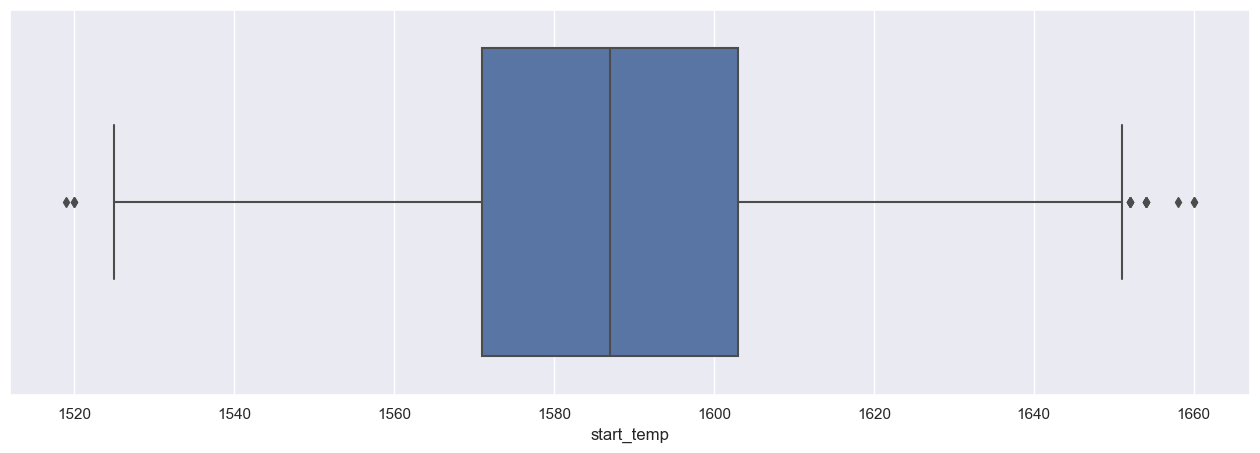

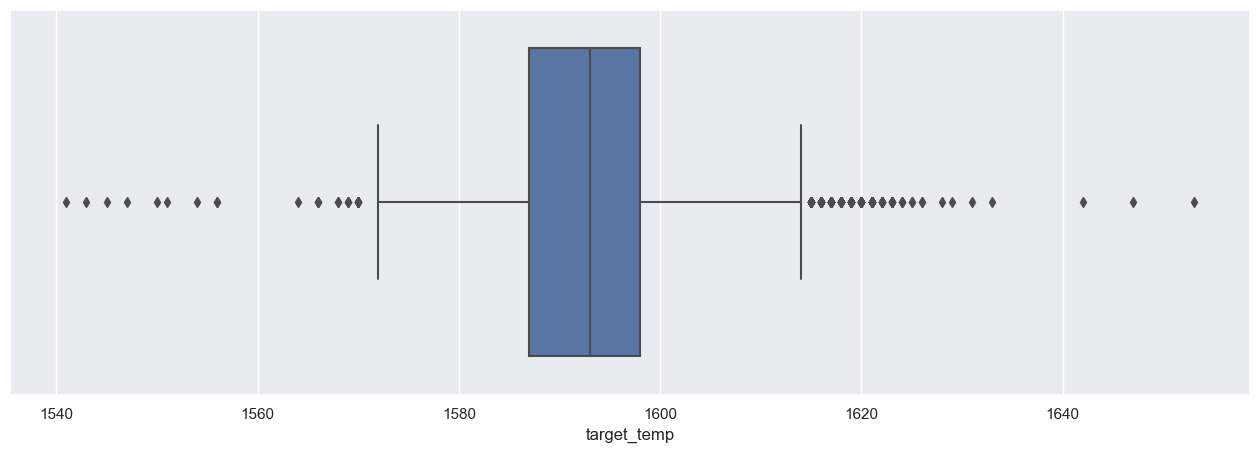

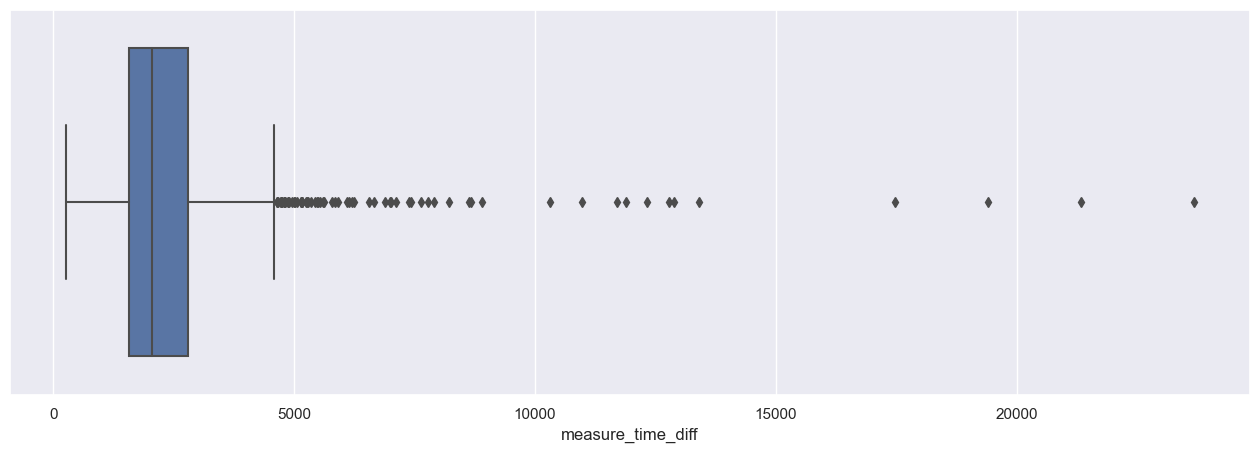

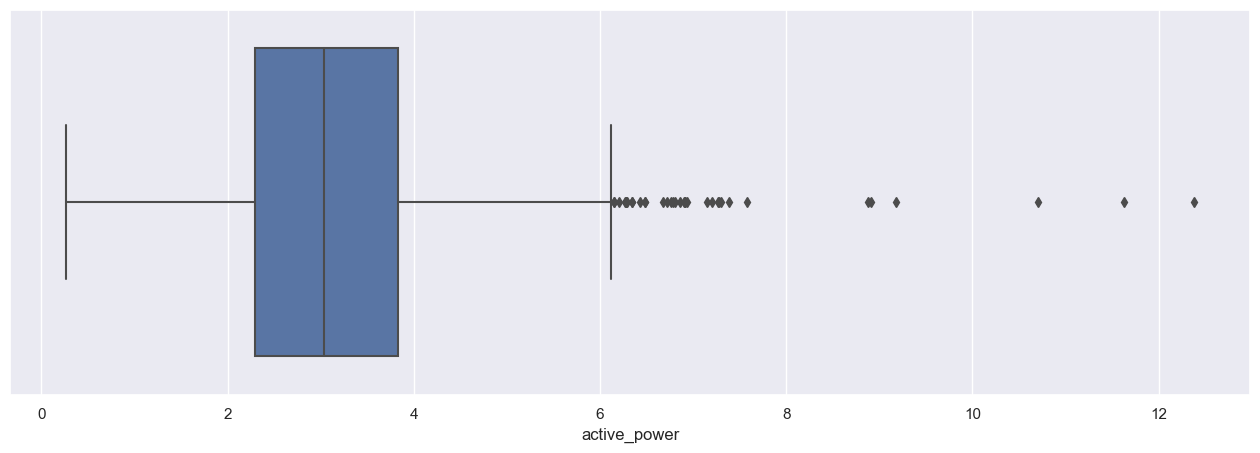

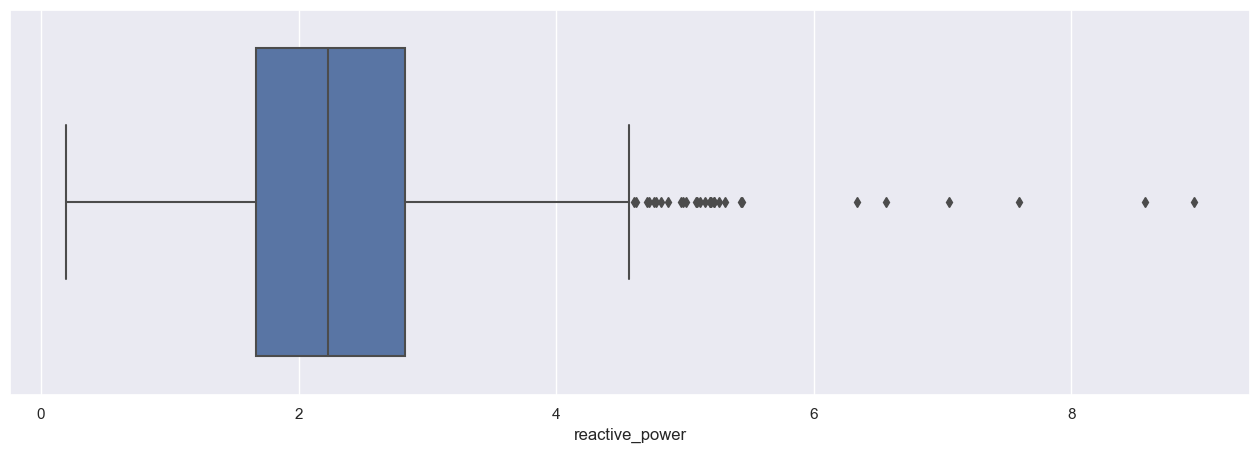

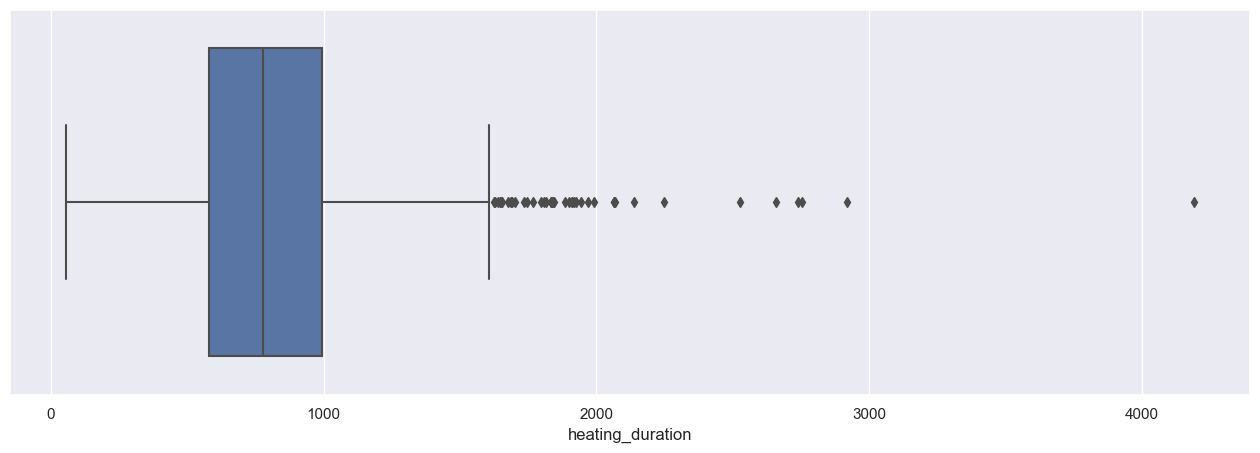

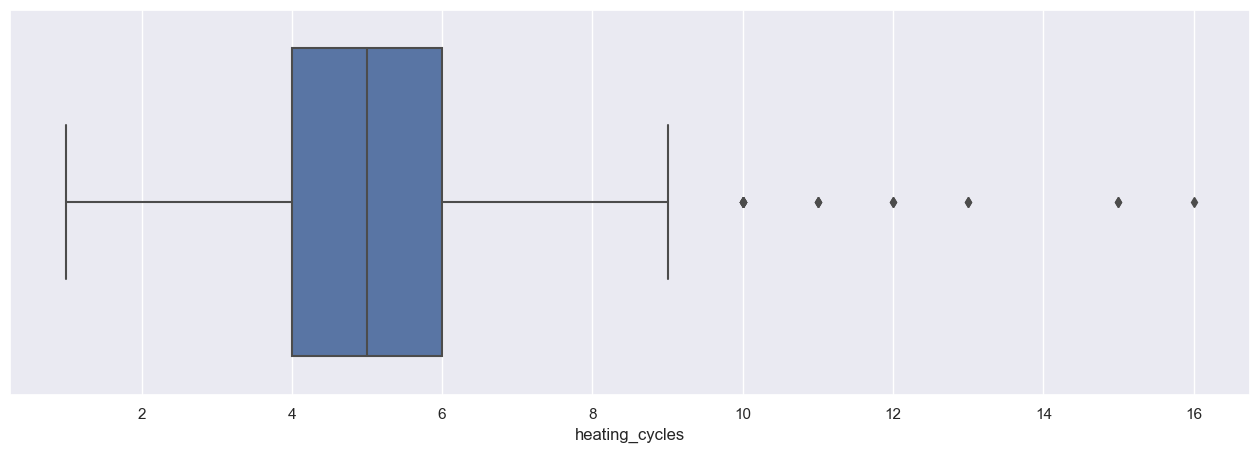

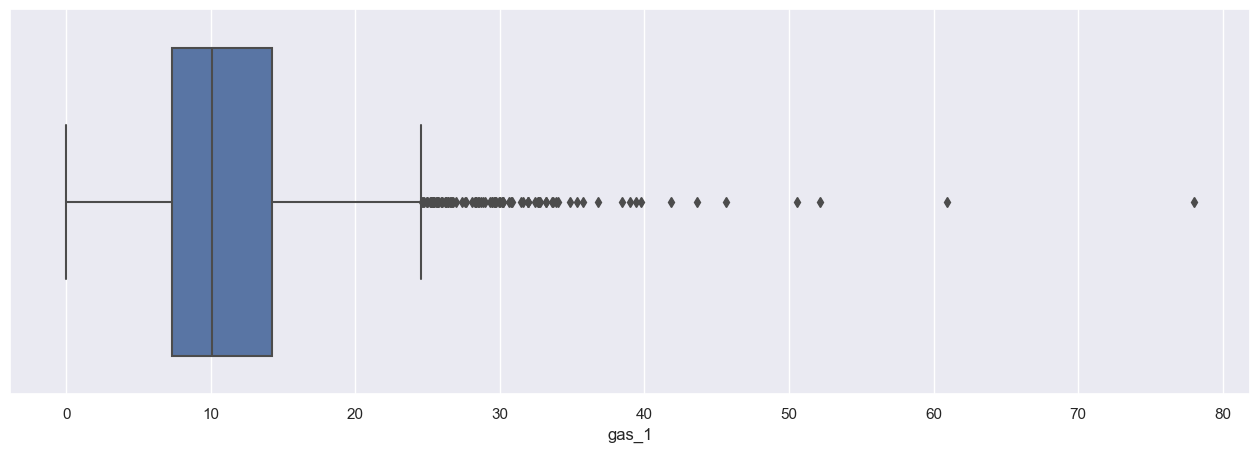

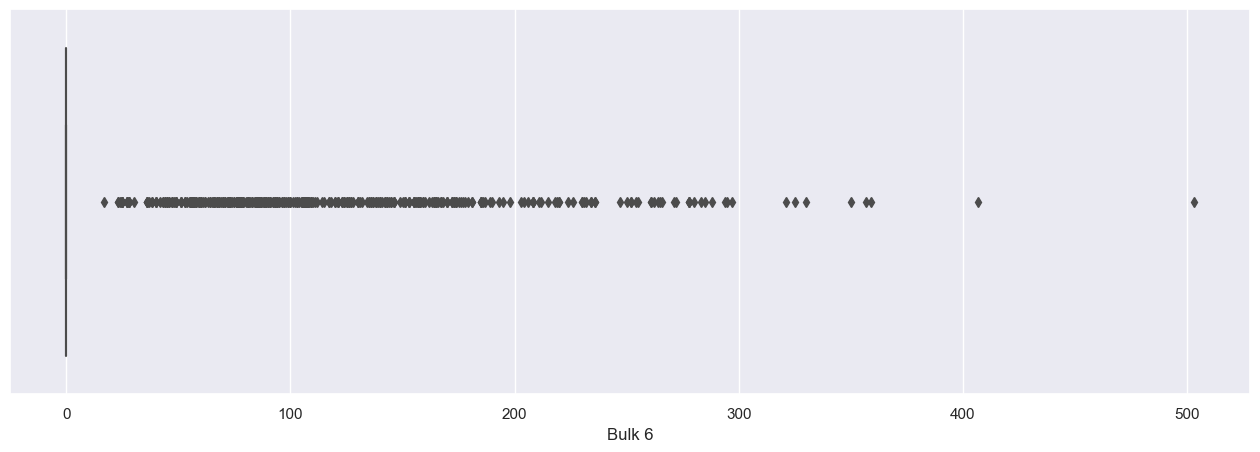

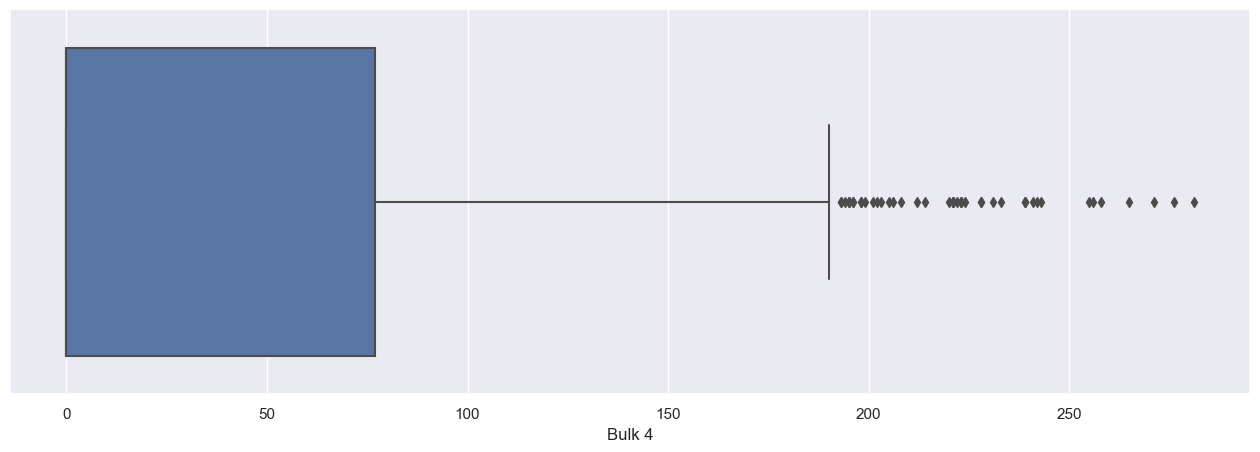

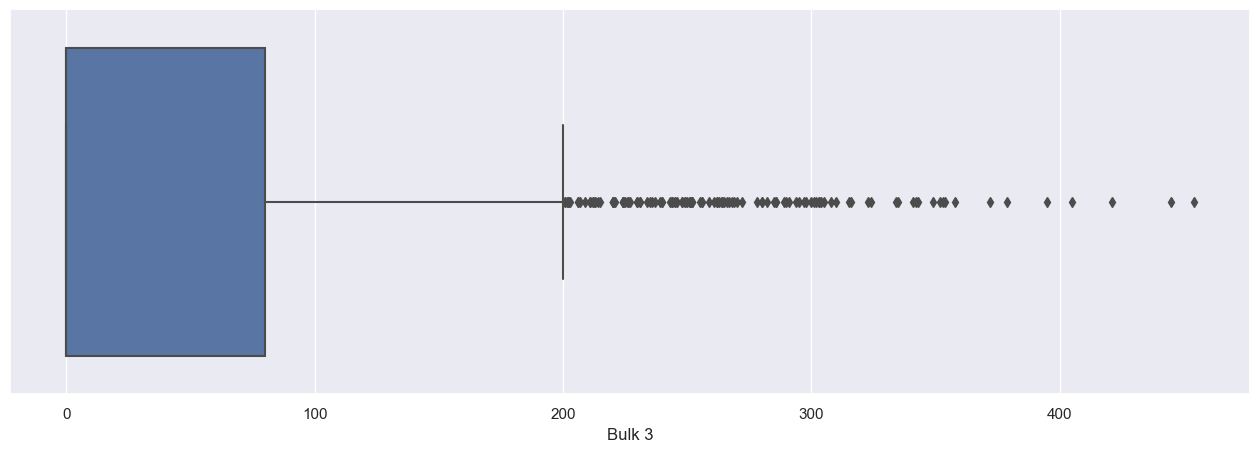

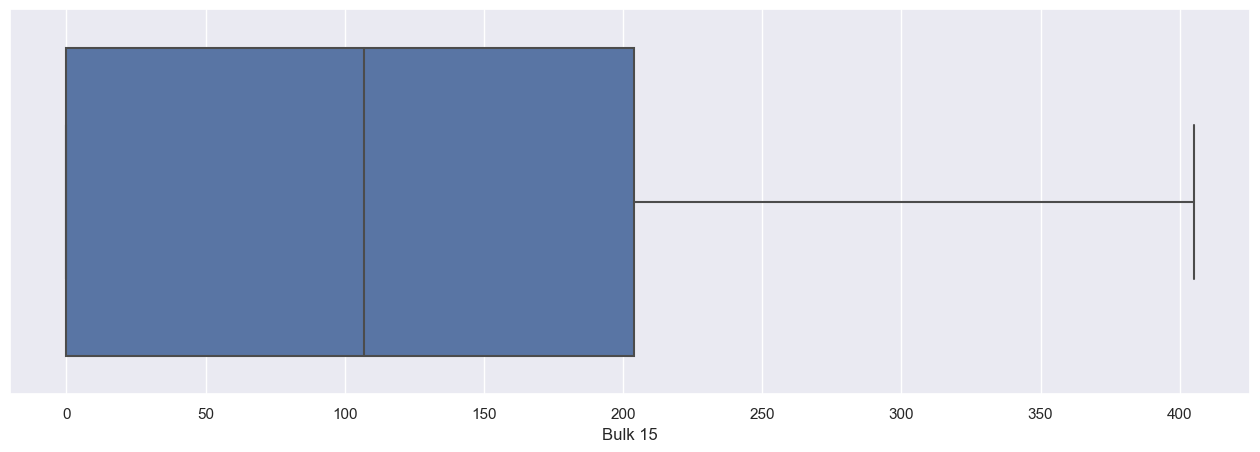

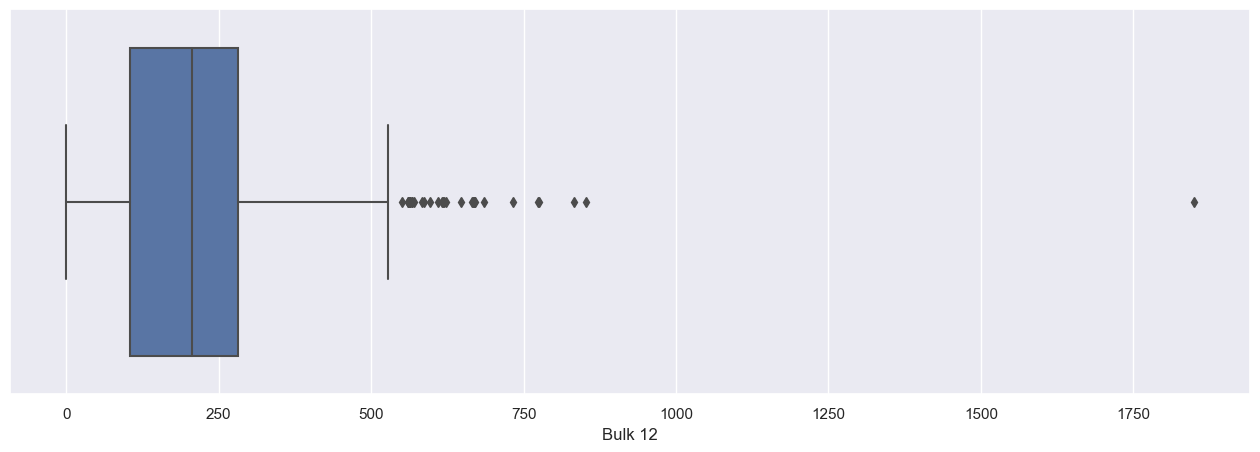

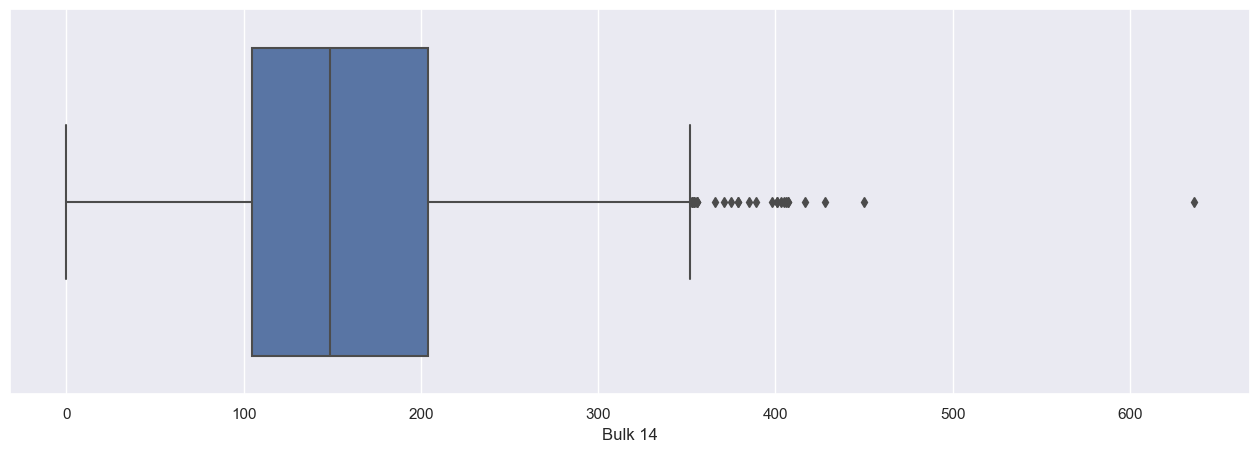

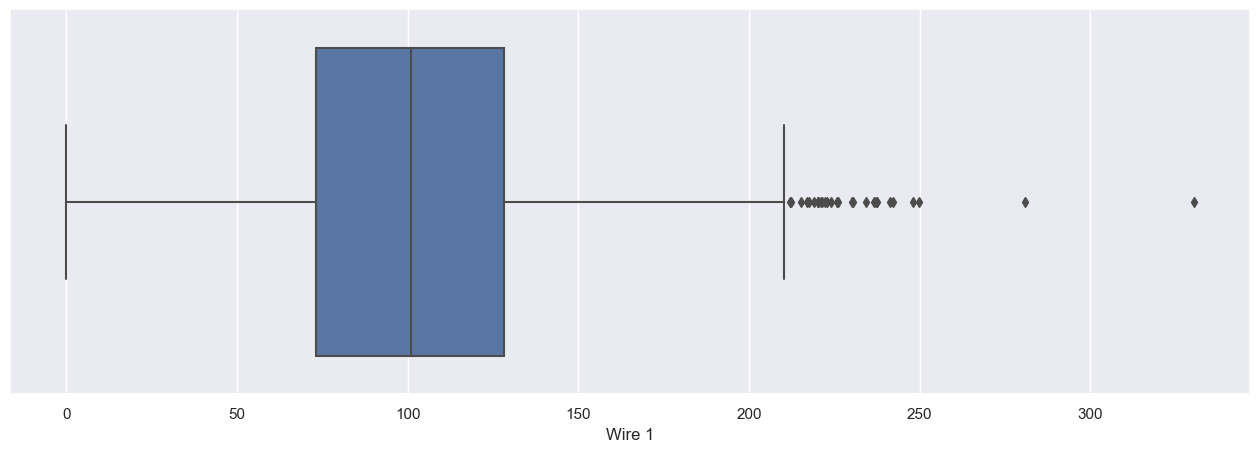

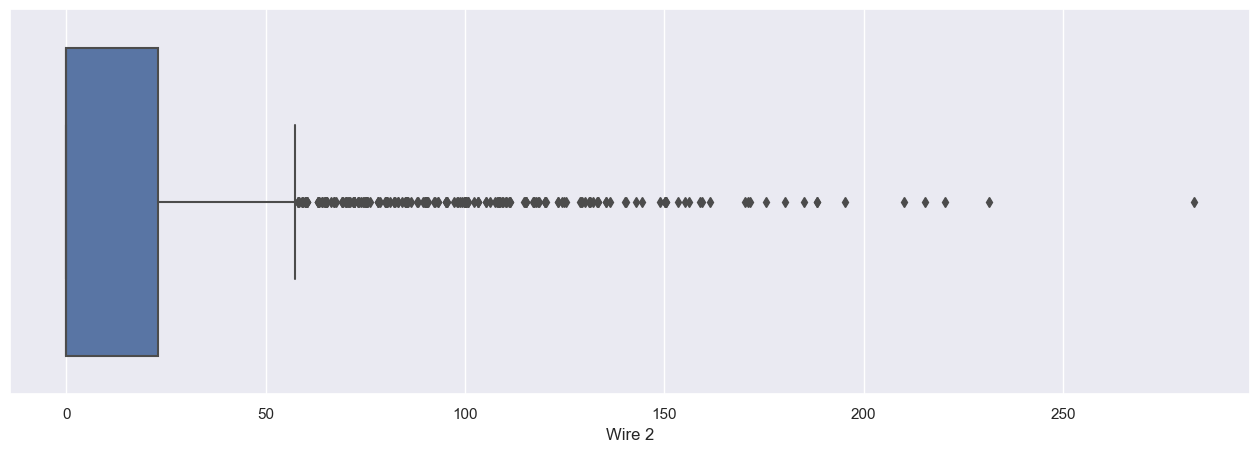

In [57]:
#–í—ã–≤–µ–¥–µ–º –±–æ–∫—Å–ø–ª–æ—Ç—ã –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ
for c in data_full.columns:
    sns.boxplot(x=data_full[c])
    plt.show()

–í–∏–¥–Ω—ã –≤—ã–±—Ä–æ—Å—ã –≤–æ –º–Ω–æ–≥–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö, –∏ –∏—Ö —Å–ª–µ–¥—É–µ—Ç –æ—á–∏—Å—Ç–∏—Ç—å –ø–µ—Ä–µ–¥ –æ–±—É—á–µ–Ω–∏–µ–º –º–æ–¥–µ–ª–µ–π
(–µ—Å—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä–æ–µ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–µ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –±–æ–∫—Å–ø–ª–æ—Ç–æ–≤ —É –ø—Ä–æ–≤–æ–ª–æ—á–Ω—ã—Ö –∏ —Å—ã–ø—É—á–∏—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤, —Å–≤—è–∑–∞–Ω–Ω–æ–µ —Å –±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –Ω—É–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π)

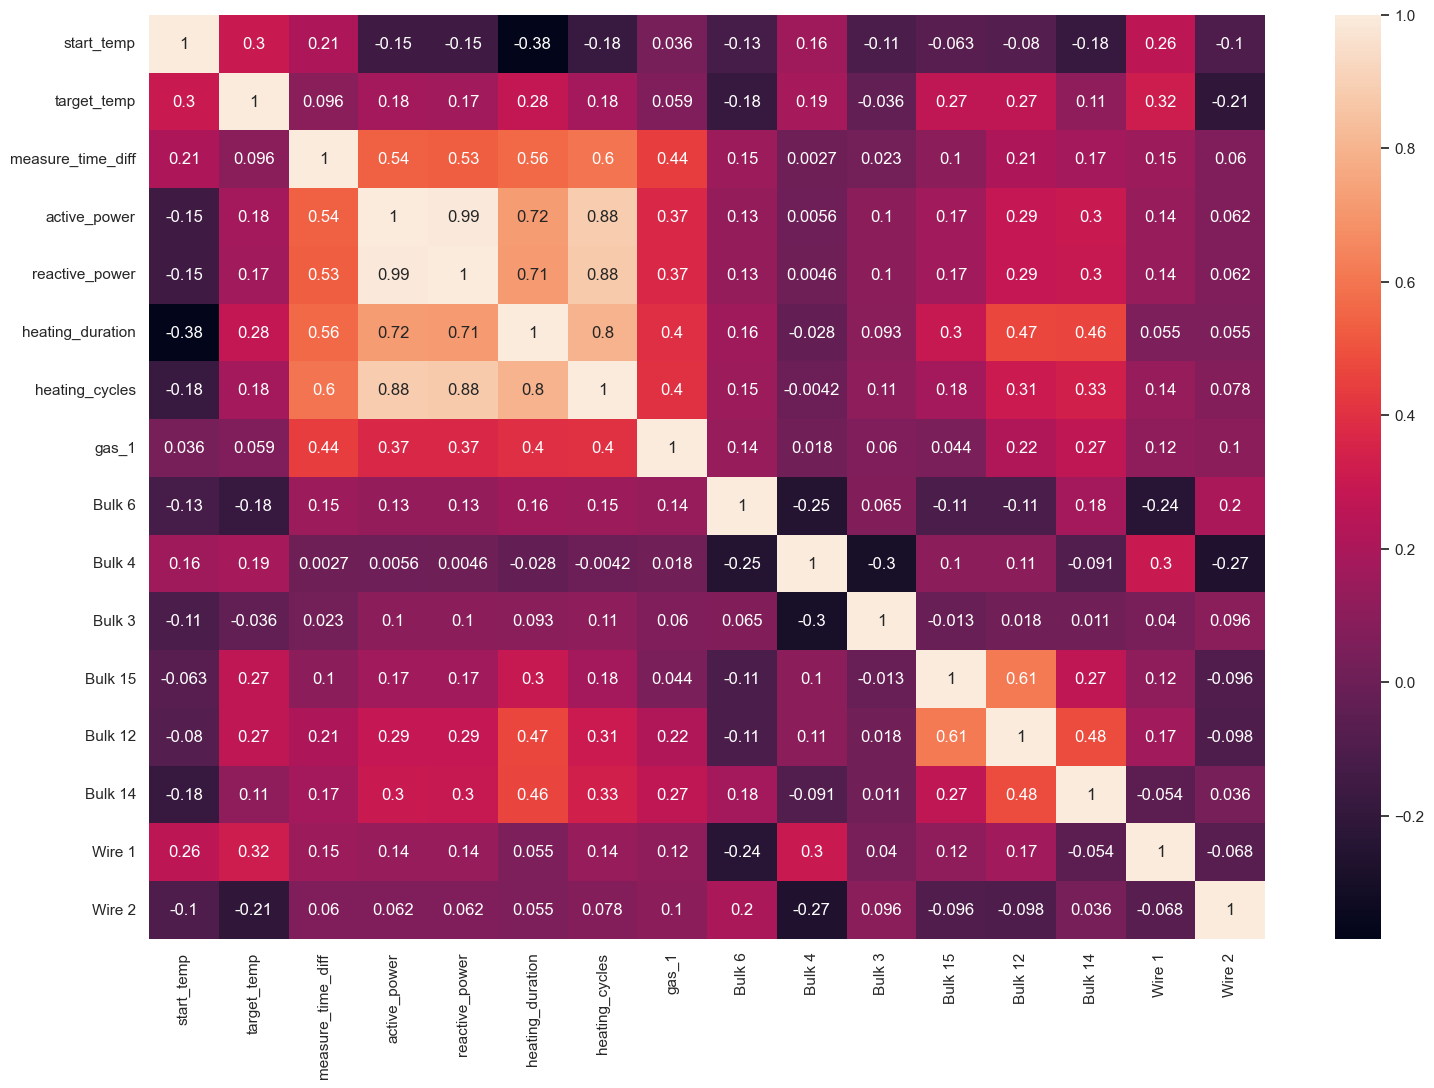

In [58]:
#–≤—ã–≤–µ–¥–µ–º —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É –≤—Å–µ—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ
plt.subplots(figsize=(18,12))
sns.heatmap(data_full.corr(), annot=True);

–ù–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Å–∏–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –∞–∫—Ç–∏–≤–Ω–æ–π –∏ —Ä–µ–∞–∫—Ç–∏–≤–Ω–æ–π –º–æ—â–Ω–æ—Å—Ç–∏. –¢–∞–∫–∂–µ –∑–∞–º–µ—Ç–Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —ç—Ç–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø—Ä–∏–∑–Ω–∞–∫–æ–º - heating_cycles.

**–í—ã–≤–æ–¥—ã**:
1. –¢–∞–±–ª–∏—Ü—ã –±—ã–ª–∏ –æ–±—ä–µ–¥–∏–Ω–µ–Ω—ã –≤ —Ñ–∏–Ω–∞–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É data_full.
2. –ë—ã–ª–∏ –≤—ã–≤–µ–¥–µ–Ω—ã —è—â–∏–∫–∏ —Å —É—Å–∞–º–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞. –í –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö –±—ã–ª–∏ –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã –≤—ã–±—Ä–æ—Å—ã –¥–∞–Ω–Ω—ã—Ö.
3. –ë—ã–ª–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∞ —Ç–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π.

### 2.4 –ì–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–ü—Ä–∏–∑–Ω–∞–∫–∏ –ê–∫—Ç–∏–≤–Ω–æ–π –∏ –†–µ–∞–∫—Ç–∏–≤–Ω–æ–π –º–æ—â–Ω–æ—Å—Ç–∏ —Å–∏–ª—å–Ω–æ —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã, –º–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –∏—Ö –Ω–∞ —Å—É–º–∞—Ä–Ω—É—é –º–æ—â–Ω–æ—Å—Ç—å.

–ê–∫—Ç–∏–≤–Ω–∞—è, —Ä–µ–∞–∫—Ç–∏–≤–Ω–∞—è –∏ —Å—É–º–º–∞—Ä–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç–∏ —Å–≤—è–∑–∞–Ω—ã —Å–ª–µ–¥—É—é—â–∏–º —É—Ä–∞–≤–Ω–µ–Ω–∏–µ–º:

$$
S = \sqrt{P^{2} + Q^{2}}
$$

–≥–¥–µ P - –∞–∫—Ç–∏–≤–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å
Q - —Ä–µ–∞–∫—Ç–∏–≤–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å
S - —Å—É–º–º–∞—Ä–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å

In [59]:
data_full.drop(columns=['active_power', 'reactive_power'])
data_full.head()

start_temp  target_temp  measure_time_diff  active_power  reactive_power  \
key                                                                             
1        1571.0       1613.0             1714.0      3.036730        2.142821   
2        1581.0       1602.0             1265.0      2.139408        1.453357   
3        1596.0       1599.0             1753.0      4.063641        2.937457   
4        1601.0       1625.0             1220.0      2.706489        2.056992   
5        1576.0       1602.0             1536.0      2.252950        1.687991   

     heating_duration  heating_cycles      gas_1  Bulk 6  Bulk 4  Bulk 3  \
key                                                                        
1              1098.0               5  29.749986     0.0    43.0     0.0   
2               811.0               4  12.555561     0.0    73.0     0.0   
3               655.0               5  28.554793     0.0    34.0     0.0   
4               741.0               4  18.841219     0.0    81.0     0.0   
5               869.0               4   5.413692     0.0    78.0     0.0   

     Bulk 15  Bulk 12  Bulk 14     Wire 1   Wire 2  
key                                                 
1      154.0    206.0    150.0  60.059998  0.00000  
2      154.0    206.0    149.0  96.052315  0.00000  
3      153.0    205.0    152.0  91.160157  0.00000  
4      154.0    207.0    153.0  89.063515  0.00000  
5      152.0    203.0    151.0  89.238236  9.11456

### 2.5 –†–∞–∑–¥–µ–ª–µ–Ω–∏e –≤—ã–±–æ—Ä–æ–∫ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é

In [60]:
#–û—Ç–¥–µ–ª–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ç–∞—Ä–≥–µ—Ç
features = data_full.drop(columns='target_temp')
target = data_full['target_temp']
features.shape

(2329, 15)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=RANDOM_SEED)

In [62]:
print('–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏:', X_train.shape)
print('–†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏:', X_test.shape)

–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: (1746, 15)
–†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: (583, 15)


–í—ã–±–æ—Ä–∫–∏ –ø–æ–¥–µ–ª–µ–Ω—ã –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏ 75:25. –†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ –ø–æ—Å–ª–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è 1746 —Å—Ç—Ä–æ–∫ –∏ 14 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

### 2.6 –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

#### 2.6.1 –û—á–∏—Å—Ç–∫–∞ –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤

–ü–æ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—é –∑–∞–∫–∞–∑—á–∏–∫–∞ –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ –¥–æ–ª–∂–Ω–æ –æ—Å—Ç–∞—Ç—å—Å—è –Ω–µ –º–µ–Ω–µ–µ 1700 —ç–ª–µ–º–µ–Ω—Ç–æ–≤.

–õ—É—á—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫–∏ –ø–æ–ª—É—á–∏–ª–∏—Å—å –ø—Ä–∏ —Ç–∞–∫–æ–º —Å–ø–æ—Å–æ–±–µ –æ—á–∏—Å—Ç–∫–∏ - –≤—ã–±—Ä–æ—Å–∞–º–∏ —Å—á–∏—Ç–∞–ª–æ—Å—å –≤—Å–µ –Ω–∏–∂–µ 0.2% –∫–≤–∞–Ω—Ç–∏–ª—è –∏ 99.9%

In [63]:
#–æ—á–∏—Å—Ç–∫–∞ –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤
X_train = X_train[~((X_train < X_train.quantile(q=0.002)) | (X_train > X_train.quantile(q=0.999))).any(axis=1)]
y_train = y_train[X_train.index]

In [64]:
X_train.shape

(1703, 15)

#### 2.6.2 –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [65]:
#–ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ —Ç—Ä–µ–Ω–µ—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ c –ø–æ–º–æ—â—å—é StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train.head()

start_temp  measure_time_diff  active_power  reactive_power  \
0    0.737717           0.552000      0.807181        0.757698   
1   -0.345216           0.580392      1.182703        1.157571   
2   -0.128629          -0.725665     -1.203928       -1.263797   
3   -0.388533           0.800017      0.401384        0.530043   
4    0.867669           0.237176     -0.553603       -0.347844   

   heating_duration  heating_cycles     gas_1    Bulk 6    Bulk 4    Bulk 3  \
0          1.298544        0.854445 -0.037419  1.926514 -0.656128  1.338974   
1          0.796634        2.168323  0.084974  0.830543 -0.656128 -0.634118   
2         -0.589891       -1.116372 -0.879765 -0.395458 -0.656128 -0.634118   
3          0.693116        0.854445 -0.720151 -0.395458 -0.656128  4.082381   
4          0.115919        0.197506 -0.723703 -0.395458  1.671509 -0.634118   

    Bulk 15   Bulk 12   Bulk 14    Wire 1    Wire 2  
0  0.976392  1.323869  0.805768  0.164674  0.900417  
1 -0.201545 -0.546523  0.346668 -1.216169  1.857905  
2 -1.438974 -1.372667  0.601723 -0.036511 -0.527589  
3  0.952595  2.011221  1.303125  0.489040 -0.527589  
4 -1.438974  1.793119  0.652734  0.720658 -0.527589

In [66]:
#–ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_test.head()

start_temp  measure_time_diff  active_power  reactive_power  \
0   -1.558100          -0.528587     -0.656557       -0.848414   
1   -1.211562          -0.283910      0.786063        0.765057   
2   -0.648437          -0.769924     -0.170300       -0.201681   
3   -1.818004          -0.132762      0.212845        0.305243   
4    0.261226          -0.001655     -1.452829       -1.312291   

   heating_duration  heating_cycles     gas_1    Bulk 6    Bulk 4    Bulk 3  \
0          0.724485        0.197506 -0.480545 -0.395458  3.434352 -0.634118   
1          1.179341        0.854445 -0.529414 -0.395458  0.798645  1.447088   
2         -0.533427       -0.459433 -1.093192 -0.395458  0.148276 -0.120573   
3          1.248353       -0.459433 -1.266990 -0.395458 -0.656128  1.352488   
4          0.087687       -1.116372  0.798445  2.966757 -0.656128 -0.634118   

    Bulk 15   Bulk 12   Bulk 14    Wire 1    Wire 2  
0 -0.213444 -0.011181 -0.635294 -0.163977 -0.527589  
1 -1.438974 -1.372667 -1.936075 -0.558359 -0.527589  
2  1.000188  0.319277 -0.418497  0.509304 -0.527589  
3  1.000188  3.042250  0.588971 -0.071374 -0.527589  
4  0.333880  1.330478  1.979021 -0.906983  0.235769


1. –î–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –æ—á–∏—â–µ–Ω—ã –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤
2. –ë—ã–ª–æ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–æ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é StandardScaler

## 3. –û–±—É—áe–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

### 3.1 Dummy model (baseline)

In [67]:
# –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –¥–∞–º–º–∏ —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä
dummy = DummyRegressor(strategy='mean')

In [68]:
dummy.fit(X_train, y_train)

DummyRegressor()

In [69]:
dummy_prediction = dummy.predict(X_test)

In [70]:
print('MAE dummy –º–æ–¥–µ–ª–∏:', round(mean_absolute_error(y_test, dummy_prediction), 2))

MAE dummy –º–æ–¥–µ–ª–∏: 8.29


### 3.2 Linear regression

In [71]:
linear = linear_model.LinearRegression(n_jobs = -1)
lin_params = {}
lin_Grid = GridSearchCV(linear, cv=3, param_grid=lin_params, scoring='neg_mean_absolute_error')
lin_Grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearRegression(n_jobs=-1), param_grid={},
             scoring='neg_mean_absolute_error')

In [72]:
lin_Grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearRegression(n_jobs=-1), param_grid={},
             scoring='neg_mean_absolute_error')

In [73]:
print('MAE –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–ª—è –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏', round(-lin_Grid.best_score_, 2))

MAE –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–ª—è –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ 5.93


### 3.3 SGD

In [74]:
SGD = linear_model.SGDRegressor(random_state=RANDOM_SEED)
SGD_params = {'penalty': ['l2', 'l1', 'elasticnet'],
             'alpha': [0.0001, 0.001, 0.01, 0.1],
             'l1_ratio': [0.01, 0.1, 0.3, 0.6]}
SGD_Grid = GridSearchCV(SGD, cv=3, param_grid=SGD_params, scoring='neg_mean_absolute_error')

In [75]:
%%time
SGD_Grid.fit(X_train, y_train)

CPU times: total: 1.89 s
Wall time: 1.71 s


GridSearchCV(cv=3, estimator=SGDRegressor(random_state=280823),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'l1_ratio': [0.01, 0.1, 0.3, 0.6],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='neg_mean_absolute_error')

In [76]:
%%time
print('MAE –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–ª—è SGD', round(-SGD_Grid.best_score_, 2))

MAE –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–ª—è SGD 5.9
CPU times: total: 0 ns
Wall time: 0 ns


In [77]:
print('–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è SGD', SGD_Grid.best_params_)

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è SGD {'alpha': 0.1, 'l1_ratio': 0.01, 'penalty': 'l1'}


### 3.4 LightGBM

In [86]:
light = LGBR(random_state=RANDOM_SEED)
light_params = {'max_depth': [4, 5, 6, 7, 8],
             'n_estimators': [100, 500, 1000, 2000],
             'learning_rate':[0.1, 0.03, 0.01, 0.001],
              'min_child_samples': [1, 5, 10, 20, 30]
             }
light_Grid = GridSearchCV(light, cv=3, param_grid=light_params, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=100)

In [87]:
%%time
light_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
CPU times: total: 7.34 s
Wall time: 1min 37s


GridSearchCV(cv=3, estimator=LGBMRegressor(random_state=280823), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.03, 0.01, 0.001],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_samples': [1, 5, 10, 20, 30],
                         'n_estimators': [100, 500, 1000, 2000]},
             scoring='neg_mean_absolute_error', verbose=100)

In [88]:
%%time
print('MAE –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–ª—è LGBR', round(-light_Grid.best_score_, 2))

MAE –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–ª—è LGBR 5.9
CPU times: total: 0 ns
Wall time: 0 ns


In [89]:
print('–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è LGBR', light_Grid.best_params_)

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è LGBR {'learning_rate': 0.01, 'max_depth': 6, 'min_child_samples': 20, 'n_estimators': 1000}


### 3.5 Catboost

In [90]:
cat = CatBoostRegressor(random_state=RANDOM_SEED)
cat_params = {'depth': [4, 5, 6],
             'iterations': [100, 500, 1000, 2000],
             'learning_rate':[0.1, 0.03, 0.01],
             'l2_leaf_reg': [1, 3, 5],
              'min_child_samples': [1, 5, 10, 20, 40]
             }
cat_Grid = GridSearchCV(cat, cv=3, param_grid=cat_params, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=100)

In [91]:
%%time
cat_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
0:	learn: 10.9087361	total: 107ms	remaining: 1m 46s
1:	learn: 10.8275924	total: 108ms	remaining: 53.9s
2:	learn: 10.7514501	total: 109ms	remaining: 36.3s
3:	learn: 10.6775041	total: 110ms	remaining: 27.4s
4:	learn: 10.6046637	total: 111ms	remaining: 22.1s
5:	learn: 10.5440665	total: 112ms	remaining: 18.6s
6:	learn: 10.4792447	total: 113ms	remaining: 16.1s
7:	learn: 10.4182311	total: 114ms	remaining: 14.1s
8:	learn: 10.3646303	total: 115ms	remaining: 12.7s
9:	learn: 10.3002385	total: 116ms	remaining: 11.5s
10:	learn: 10.2480930	total: 118ms	remaining: 10.6s
11:	learn: 10.1899732	total: 119ms	remaining: 9.76s
12:	learn: 10.1395702	total: 120ms	remaining: 9.08s
13:	learn: 10.0854467	total: 121ms	remaining: 8.52s
14:	learn: 10.0395661	total: 122ms	remaining: 8.02s
15:	learn: 9.9884078	total: 123ms	remaining: 7.59s
16:	learn: 9.9364836	total: 125ms	remaining: 7.22s
17:	learn: 9.8931336	total: 126ms	remaining: 6.87s
18:	learn: 9

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001F25E5B5270>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6],
                         'iterations': [100, 500, 1000, 2000],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.1, 0.03, 0.01],
                         'min_child_samples': [1, 5, 10, 20, 40]},
             scoring='neg_mean_absolute_error', verbose=100)

In [92]:
%%time
print('MAE –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–ª—è catboost', round(-cat_Grid.best_score_, 2))

MAE –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–ª—è catboost 5.82
CPU times: total: 0 ns
Wall time: 0 ns


In [93]:
print('–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è catboost', cat_Grid.best_params_)

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è catboost {'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.03, 'min_child_samples': 1}


### 3.6 XGBoost

In [111]:
xgbr = XGBR(random_state=RANDOM_SEED)
xgbr_params = {'max_depth': [4, 5, 6, 7, 8],
               'n_estimators': [100, 500, 1000, 2000],
               'learning_rate':[0.1, 0.03, 0.01],
               'min_split_loss': [0, 1, 5, 10],
               'min_child_weight' : [1, 3, 5, 7]
             }
xgbr_Grid = GridSearchCV(xgbr, cv=3, param_grid=xgbr_params, scoring='neg_mean_absolute_error', n_jobs=-1)

In [112]:
%%time
xgbr_Grid.fit(X_train, y_train)

CPU times: total: 12.5 s
Wall time: 11min 7s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=280823, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.03, 0.01],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 3, 5, 7],
                         'min_split_loss': [0, 1, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000]},
             scoring='neg_mean_absolute_error')

In [113]:
%%time
print('MAE –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–ª—è XGBR', round(-xgbr_Grid.best_score_, 2))

MAE –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥–ª—è XGBR 5.83
CPU times: total: 0 ns
Wall time: 0 ns


In [114]:
print('–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è XGBR', xgbr_Grid.best_params_)

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è XGBR {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'min_split_loss': 10, 'n_estimators': 100}


### 3.7 Stacking

In [156]:
ridge = linear_model.Ridge(random_state=RANDOM_SEED)
lasso = linear_model.Lasso(random_state=RANDOM_SEED)

stack = StackingCVRegressor(regressors=(lasso, ridge),
                            meta_regressor=cat, 
                            random_state=RANDOM_SEED,
                            use_features_in_secondary=True)

grid = GridSearchCV(
    estimator=stack, 
    param_grid={
        'lasso__alpha': [0.2, 0.6, 0.8, 1],
        'ridge__alpha': [x/20.0 for x in range(1, 10, 3)],
        'meta_regressor__depth': [4, 5, 6],
        'meta_regressor__iterations': [100, 500, 1000],
        'meta_regressor__learning_rate':[0.1, 0.03, 0.01],
    }, 
    cv=3,
    refit=True,
    scoring='neg_mean_absolute_error', 
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best MAE: %f using params: %s" % (grid.best_score_, grid.best_params_))

0:	learn: 10.8523360	total: 2.44ms	remaining: 1.22s
1:	learn: 10.7274938	total: 4.94ms	remaining: 1.23s
2:	learn: 10.6127619	total: 6.68ms	remaining: 1.11s
3:	learn: 10.4977292	total: 8.41ms	remaining: 1.04s
4:	learn: 10.3790656	total: 10.1ms	remaining: 996ms
5:	learn: 10.2735989	total: 11.7ms	remaining: 967ms
6:	learn: 10.1673080	total: 13.4ms	remaining: 943ms
7:	learn: 10.0618074	total: 15ms	remaining: 923ms
8:	learn: 9.9642702	total: 16.8ms	remaining: 919ms
9:	learn: 9.8692199	total: 19ms	remaining: 929ms
10:	learn: 9.7706144	total: 20.8ms	remaining: 923ms
11:	learn: 9.6799904	total: 22.4ms	remaining: 912ms
12:	learn: 9.5961830	total: 24.1ms	remaining: 901ms
13:	learn: 9.5234021	total: 25.6ms	remaining: 890ms
14:	learn: 9.4433866	total: 27.2ms	remaining: 879ms
15:	learn: 9.3640941	total: 28.8ms	remaining: 871ms
16:	learn: 9.2890229	total: 30.5ms	remaining: 867ms
17:	learn: 9.2269374	total: 32.1ms	remaining: 860ms
18:	learn: 9.1555907	total: 33.7ms	remaining: 853ms
19:	learn: 9.08501

In [157]:
ridge = linear_model.Ridge(random_state=RANDOM_SEED)
lasso = linear_model.Lasso(random_state=RANDOM_SEED)

stack = StackingCVRegressor(regressors=(lasso, ridge, light),
                            meta_regressor=cat, 
                            random_state=RANDOM_SEED,
                            use_features_in_secondary=True)

grid = GridSearchCV(
    estimator=stack, 
    param_grid={
        'lasso__alpha': [0.2, 0.6, 0.8, 1],
        'ridge__alpha': [x/20.0 for x in range(1, 10, 3)],
        'meta_regressor__depth': [4, 5, 6],
        'meta_regressor__iterations': [100, 500, 1000],
        'meta_regressor__learning_rate':[0.1, 0.03, 0.01],
    }, 
    cv=3,
    refit=True,
    scoring='neg_mean_absolute_error', 
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best MAE: %f using params: %s" % (grid.best_score_, grid.best_params_))

0:	learn: 10.8579976	total: 1.64ms	remaining: 818ms
1:	learn: 10.7296435	total: 3.39ms	remaining: 844ms
2:	learn: 10.6123951	total: 4.74ms	remaining: 785ms
3:	learn: 10.4839751	total: 5.99ms	remaining: 743ms
4:	learn: 10.3598794	total: 7.31ms	remaining: 724ms
5:	learn: 10.2480921	total: 8.62ms	remaining: 710ms
6:	learn: 10.1389205	total: 9.9ms	remaining: 698ms
7:	learn: 10.0323755	total: 11.2ms	remaining: 686ms
8:	learn: 9.9335780	total: 12.5ms	remaining: 680ms
9:	learn: 9.8279016	total: 13.9ms	remaining: 681ms
10:	learn: 9.7356092	total: 15.1ms	remaining: 672ms
11:	learn: 9.6387407	total: 16.5ms	remaining: 670ms
12:	learn: 9.5528429	total: 17.8ms	remaining: 667ms
13:	learn: 9.4672934	total: 19.2ms	remaining: 665ms
14:	learn: 9.3915625	total: 20.5ms	remaining: 663ms
15:	learn: 9.3223933	total: 21.8ms	remaining: 660ms
16:	learn: 9.2496111	total: 23.1ms	remaining: 656ms
17:	learn: 9.1831896	total: 24.4ms	remaining: 654ms
18:	learn: 9.1220437	total: 25.7ms	remaining: 652ms
19:	learn: 9.05

**–í—ã–≤–æ–¥—ã**:
1. –ë—ã–ª–∏ –æ–±—É—á–µ–Ω—ã –º–æ–¥–µ–ª–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è, –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –º–µ—Ç—Ä–∏–∫–∏ –ú–ê–ï –ø–æ–ª—É—á–∏–ª—Å—è —É –º–æ–¥–µ–ª–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ catboost.
2. –ë—ã–ª–∞ –æ–±—É—á–µ–Ω–∞ Dummy –º–æ–¥–µ–ª—å –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –º–æ–¥–µ–ª–µ–π –Ω–∞ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å. –ú–ê–ï Dummy –º–æ–¥–µ–ª–∏ —Å–æ—Å—Ç–∞–≤–∏–ª–∞ 8.27

## –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [ ]:
print('MAE –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ', round(mean_absolute_error(y_test, cat_Grid.predict(X_test)), 2))

–ü–æ–ª—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –ø—Ä–æ—Ö–æ–¥–∏—Ç —Ç–µ—Å—Ç –Ω–∞ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å - –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ MAE –ª—É—á—à–µ —á–µ–º —É –ø—Ä–∏–º–∏—Ç–∏–≤–Ω–æ–π –º–æ–¥–µ–ª–∏ (dummy, c –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ–º —Å—Ä–µ–¥–Ω–∏–º).

–¢–∞–∫–∂–µ, –º–æ–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ –ú–ê–ï –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ –Ω–∞ —Ç–µ—Å—Ç–µ –ø–æ–∫–∞–∑–∞–ª–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.

In [ ]:
print('R2-–º–µ—Ç—Ä–∏–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ', round(r2_score(y_test, cat_Grid.predict(X_test)), 2))

–≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –ª–∏—à—å 52% –∏–∑–º–µ–Ω—á–∏–≤–æ—Å—Ç–∏ –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –º–æ–∂–µ—Ç –±—ã—Ç—å –æ–±—å—è—Å–Ω–µ–Ω–æ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª—å—é. –û—Å—Ç–∞–≤—à–∞—è—Å—è —á–∞—Å—Ç—å –æ–±—å—è—Å–Ω—è–µ—Ç—Å—è –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–º–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—è–º–∏, –ø–æ—ç—Ç–æ–º—É –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ –º–æ–≥ —Å—Ä–∞–±–æ—Ç–∞—Ç—å –ª—É—á—à–µ, —á–µ–º –ª–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å.

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b> 
        
–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–æ –ø—Ä–∞–≤–∏–ª—å–Ω–æ. –û—Ç–ª–∏—á–Ω–æ, —á—Ç–æ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –≤—ã–≤–µ–¥–µ–Ω–∞ –º–µ—Ç—Ä–∏–∫–∞ r2 —Ä–∞–¥–∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏

**–í–∞–∂–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏**

In [ ]:
#–æ–±—É—á–∏–º –º–æ–¥–µ–ª—å —Å –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –ì–ü
cat = CatBoostRegressor(random_state=280823, depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.03, verbose=0)\
.fit(X_train, y_train)

In [ ]:
#–∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—É–µ–º shap explainer
explainer = shap.TreeExplainer(cat)

In [ ]:
#–ø–æ–ª—É—á–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏
shap_values = explainer.shap_values(X_train, y_train)

In [ ]:
#–∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è java
shap.initjs()

In [ ]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
shap.summary_plot(shap_values, X_train, plot_type="bar")

–ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –Ω–∞ –∫–æ–Ω–µ—á–Ω—É—é —Ç–µ–º–ø–µ—Ä—É—Ç—É—Ä—É –≤–ª–∏—è—é—Ç:

1. –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –Ω–∞–≥—Ä–µ–≤–∞(—á—Ç–æ –Ω–µ —É–¥–∏–≤–∏—Ç–µ–ª—å–Ω–æ)
2. –ù–∞—á–∞–ª—å–Ω–∞—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
3. –†–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É –∏–∑–º–µ—Ä–µ–Ω–∏—è–º–∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã( —á—Ç–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ –¥—É–±–ª–∏—Ä—É–µ—Ç –ø–µ—Ä–≤—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä)

–î–∞–ª–µ–µ –∏–¥—É—Ç –ø–æ–¥–∞—á–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤. –ß—Ç–æ —É–¥–∏–≤–∏—Ç–µ–ª—å–Ω–æ, —á—Ç–æ —Å—É–º–º–∞—Ä–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å –≤ –ø–æ—Å–ª–µ–¥–Ω–µ–π —Ç—Ä–æ–π–∫–µ.

In [ ]:
#–°–∏–ª–∞ —ç—Ñ—Ñ–µ–∫—Ç–∞ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –∏ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —ç—Ñ—Ñ–µ–∫—Ç–∞
shap.summary_plot(shap_values, X_train)

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –ø–æ–∫–∞–∑–∞–Ω—ã —Å –∫–∞–∫–æ–π —Å–∏–ª–æ–π –∏ –≤ –∫–∞–∫—É—é —Å—Ç–æ—Ä–æ–Ω—É –≤–ª–∏—è—é—Ç —Ä–∞–∑–ª–∏—á–Ω—ã–µ —ç—Ñ—Ñ–µ–∫—Ç—ã.
–ö –ø—Ä–∏–º–µ—Ä—É —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –Ω–∞–≥—Ä–µ–≤–∞ –∏ –Ω–∞—á–∞–ª—å–Ω–æ–π —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–æ–π —É–≤–µ–ª–∏—á–∏–≤–∞—é—Ç –∏ –∫–æ–Ω–µ—á–Ω—É—é —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—É, –∞ –º–µ–Ω—å—à–µ–µ –≤—Ä–µ–º—è –∏–∑–º–µ—Ä–µ–Ω–∏—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä(–≤—Å–ª–µ–¥—Å—Ç–≤–∏–µ –æ—á–µ–≤–∏–¥–Ω–æ –º–µ–Ω–µ–µ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –Ω–∞–≥—Ä–µ–≤–∞) —É–º–µ–Ω—å—à–∞—é—Ç —Ñ–∏–Ω–∞–ª—å–Ω—É—é —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—É.

In [ ]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —ç—Ñ—Ñ–µ–∫—Ç–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞, –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞
shap.force_plot(explainer.expected_value, shap_values[0:50,:], X_train.iloc[0:50,:])

**–í—ã–≤–æ–¥—ã**:
1. –ë—ã–ª–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–æ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ú–ê–ï —Å–æ—Å—Ç–∞–≤–∏–ª–æ 5.73, —á—Ç–æ –Ω–∏–∂–µ dummy –º–æ–¥–µ–ª–∏ –∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ–≥–æ –º–∏–Ω–∏–º—É–º–∞ 6.8
2. –ë—ã–ª–∞ –ø–æ–ª—É—á–µ–Ω–∞ R2-–º–µ—Ç—Ä–∏–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ, –∫–æ—Ç–æ—Ä–∞—è —Å–æ—Å—Ç–∞–≤–∏–ª–∞ 0.52
3. –ë—ã–ª–∞ –∏–∑—É—á–µ–Ω–∞ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b> 
    
–ú–æ–ª–æ–¥–µ—Ü, —á—Ç–æ –Ω–µ –∑–∞–±—ã–≤–∞–µ—à—å –æ—Ü–µ–Ω–∏—Ç—å –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–æ–¥–µ–ª–∏

## –ò—Ç–æ–≥–æ–≤—ã–µ –≤—ã–≤–æ–¥—ã

1. –ë—ã–ª–∞ –ø—Ä–æ–≤–µ–¥–µ–Ω–∞ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–∞—è –æ—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö, –∞ —Ç–∞–∫–∂–µ –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É key –∏ –≤—ã–¥–µ–ª–µ–Ω–∏–µ –Ω—É–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
2. –ë—ã–ª–∞ –ø—Ä–æ–≤–µ–¥–µ–Ω–∞ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö —Å —Å—ã–ø—É—á–∏–º–∏ –∏ –ø—Ä–æ–≤–æ–ª–æ—á–Ω—ã–º–∏ –º–∞—Ç–µ—Ä–∏–∞–ª–∞–º–∏.
3. –¢–∞–±–ª–∏—Ü—ã –±—ã–ª–∏ –æ–±—ä–µ–¥–∏–Ω–µ–Ω—ã –≤ –æ–¥–Ω—É –º–µ—Ç–æ–¥–æ–º INNER JOIN.
4. –í—ã–±–æ—Ä–∫–∏ –±—ã–ª–∏ —Ä–∞–∑–¥–µ–ª–µ–Ω—ã –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏ 75/25.
5. –ë—ã–ª–∏ —Å–æ–∑–¥–∞–Ω—ã –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∞ —Ç–∞–∫–∂–µ —É–¥–∞–ª–µ–Ω—ã —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.
6. –î–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –æ—á–∏—â–µ–Ω—ã –∏ –º–∞—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω—ã.
7. –ë—ã–ª–∏ –æ–±—É—á–µ–Ω—ã –º–æ–¥–µ–ª–∏: –õ–∏–Ω–µ–π–Ω–∞—è, SGD –∏ catboost. –ú–æ–¥–µ–ª–∏ –±—ã–ª–∏ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∏—Ä–æ–≤–∞–Ω—ã —Å –ø–æ–º–æ—â—å—é GridSearch. –ë—ã–ª–∞ –æ—Ç–æ–±—Ä–∞–Ω–∞ –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å - catboost.
8. –û—Ç–æ–±—Ä–∞–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –±—ã–ª–∞ –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ, –ú–ê–ï = 5.73 –∏ –ø—Ä–æ–≤–µ—Ä–µ–Ω–∞ –Ω–∞ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å.
9. –ë—ã–ª–∞ –ø–æ–ª—É—á–µ–Ω–∞ r2-–º–µ—Ç—Ä–∏–∫–∞, –∫–æ—Ç–æ—Ä–∞—è —Å–æ—Å—Ç–∞–≤–∏–ª–∞ 0.52
10. –ù–∞–ø–∏—Å–∞–Ω–∏–µ –≤—ã–≤–æ–¥–æ–≤ –æ –ø—Ä–æ–¥–µ–ª–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ –∏ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ –æ—Ç—á–µ—Ç–∞.
11. –ë—ã–ª–∞ –∏–∑—É—á–µ–Ω–∞ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ—Ç–æ–±—Ä–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏.

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> –ò—Ç–æ–≥–æ–≤—ã–π –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>    
    
  
–£ –º–µ–Ω—è —Å–ª–æ–∂–∏–ª–æ—Å—å –æ—Ç–ª–∏—á–Ω–æ–µ –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏–µ –æ –ø—Ä–æ–µ–∫—Ç–µ, —Ç–µ–±–µ —É–¥–∞–ª–æ—Å—å —Å–ø—Ä–∞–≤–∏—Ç—å—Å—è —Å —Ç–∞–∫–∏–º –≤—ã–ø—É—Å–∫–Ω—ã–º –ø—Ä–æ–µ–∫—Ç–æ–º. –ú–æ–ª–æ–¥–µ—Ü! –ü–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω—ã –¥–∞–Ω–Ω—ã–µ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞, –∏–∑—É—á–µ–Ω—ã –≤—Å–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã. –í—Å–µ –∫—Ä–∞—Å–∏–≤–æ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–æ, –ø–æ—Å—Ç—Ä–æ–µ–Ω–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–æ–¥–µ–ª–µ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ –æ—Ü–µ–Ω–µ–Ω–æ –∏—Ö –∫–∞—á–µ—Å—Ç–≤–æ. –û—Å–º—ã—Å–ª–µ–Ω–Ω–∞—è –∞–Ω–∞–ª–∏—Ç–∏–∫–∞ –∏ –¥–µ–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å–Ω–∞—è —Ä–∞–±–æ—Ç–∞ - –º–Ω–æ–≥–æ–µ —É–¥–∞–ª–æ—Å—å –∫–∞–∫ –Ω–∞–¥–æ)
    
–û—Ç–º–µ—á—É –æ—Ç–¥–µ–ª—å–Ω—ã–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã –ø—Ä–æ–µ–∫—Ç–∞üôÇ:
    
- –≤ —Ö–æ–¥–µ –ø—Ä–æ–µ–∫—Ç–∞ –≤—Å—Ç—Ä–µ—á–∞–ª–∏—Å—å  —Ñ—É–Ω–∫—Ü–∏–∏, –ø–æ–º–æ–≥–∞—é—â–∏–µ –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç –¥—É–±–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∫–æ–¥–∞;
- –º–Ω–æ–≥–æ –∫—Ä–∞—Å–∏–≤—ã—Ö –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–π –≤ –ø—Ä–æ–µ–∫—Ç–µ –∏ —Ö–æ—Ä–æ—à–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è;
- –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–µ–π –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—è –∏ –ø–æ–∏—Å–∫ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.
    
–ï—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–æ–º–µ–Ω—Ç–æ–≤ –≤—Å–µ–≥–æ, –Ω–∞ –∫–æ—Ç–æ—Ä—ã–µ —Å—Ç–æ–∏—Ç –µ—â—ë —Ä–∞–∑ –≤–∑–≥–ª—è–Ω—É—Ç—å, —è —É–∫–∞–∑–∞–ª –∏—Ö –≤ –º–æ–∏—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è—Ö –ø–æ —Ö–æ–¥—É –ø—Ä–æ–µ–∫—Ç–∞. –ü—Ä–µ–¥–ª–∞–≥–∞—é —Ç–µ–±–µ –¥–æ—Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–æ–µ–∫—Ç –ø–æ –º–æ–∏–º –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è–º, —á—Ç–æ–±—ã –¥–æ–≤–µ—Å—Ç–∏ –µ–≥–æ –¥–æ —Å–æ–≤–µ—Ä—à–µ–Ω—Å—Ç–≤–∞.

    
 
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ 2 <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b> –ö–æ–¥ –ø—Ä–∏–Ω–∏–º–∞—é, –ø–µ—Ä–µ—Ö–æ–¥–∏–º –∫ –æ—Ç—á–µ—Ç—É.  
    
–û—Ç—á–µ—Ç –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –ø–æ —Ç–∞–∫–∏–º –ø—É–Ω–∫—Ç–∞–º (–≤—Å–µ –ø—É–Ω–∫—Ç—ã –æ–±—è–∑–∞—Ç–µ–ª—å–Ω—ã–µ, —Å—Ç–æ–∏—Ç —Å–Ω–∞—á–∞–ª–∞ –¥–∞–≤–∞—Ç—å –∑–∞–≥–æ–ª–æ–≤–∫–∏ –∫ –∫–∞–∂–¥–æ–º—É –ø—É–Ω–∫—Ç—É –æ—Ç—á–µ—Ç–∞, –∏ –ø–æ—Å–ª–µ –Ω–∏—Ö —É–∂–µ –ø–∏—Å–∞—Ç—å —Å–∞–º–æ —Ç–µ–∫—Å—Ç–æ–≤–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ –ø—É–Ω–∫—Ç–∞):

  - —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ—à–µ–Ω–∏—è –∏ –ø–ª–∞–Ω–∞, –µ—Å–ª–∏ –µ—Å—Ç—å –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ, —Ç–æ –Ω—É–∂–Ω–æ –æ–±—ä—è—Å–Ω—è—Å–Ω–∏—Ç—å, –ø–æ—á–µ–º—É –∫–∞–∫–∏–µ-—Ç–æ –ø—É–Ω–∫—Ç—ã –Ω–µ –≤—ã–ø–æ–ª–Ω–µ–Ω—ã
  - –æ–ø–∏—Å–∞–Ω–∏–µ —Ç—Ä—É–¥–Ω–æ—Å—Ç–µ–π –ø—Ä–æ–µ–∫—Ç–∞ –∏ –∫–∞–∫ –æ–Ω–∏ –±—ã–ª–∏ —Ä–µ—à–µ–Ω—ã  
  - –æ–ø–∏—Å–∞–Ω–∏–µ –∫–ª—é—á–µ–≤—ã—Ö —à–∞–≥–æ–≤ —Ä–µ—à–µ–Ω–∏—è (–µ—Å–ª–∏ –∏—Ö –Ω–µ—Ç, —Ç–æ –Ω—É–∂–Ω–æ –Ω–∞–ø–∏—Å–∞—Ç—å "–∫–ª—é—á–µ–≤—ã—Ö —à–∞–≥–æ–≤ —Ä–µ—à–µ–Ω–∏—è –Ω–µ—Ç")    
  - –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –ò—Ç–æ–≥–æ–≤–æ–π –º–æ–¥–µ–ª–∏ –∏ –æ–ø–∏—Å–∞—Ç—å –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ, –∫–∞–∫ –≤—Å–µ —ç—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–ª–∏—Å—å (–Ω—É–∂–Ω–æ —Ä–∞—Å—Å–∫–∞–∑–∞—Ç—å –∏–º–µ–Ω–Ω–æ –ø—Ä–æ –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ò—Ç–æ–≥–æ–≤–æ–π –º–æ–¥–µ–ª–∏)
  - –ø–æ–ª–Ω–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ –ò—Ç–æ–≥–æ–≤–æ–π –º–æ–¥–µ–ª–∏ (—Å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –≤–∫–ª—é—á–∞—è random_state, –µ—Å–ª–∏ –±—ã–ª –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω) –∏ –∏—Ç–æ–≥–æ–≤–∞—è –º–µ—Ç—Ä–∏–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ 
    
–ù–∞–ø–æ–º–Ω—é, —á—Ç–æ –ø—Ä–æ–¥–æ–ª–∂–∞—Ç—å —Å–ª–µ–¥—É–µ—Ç –ø—Ä—è–º–æ –≤ —ç—Ç–æ–π —Ä–∞–±–æ—Ç–µ, –Ω–µ —É–¥–∞–ª—è—Ç—å –Ω–∏–∫–∞–∫–∏–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ –∏ –∫–æ–¥.
    
    
</div>

## –ò—Ç–æ–≥–æ–≤—ã–π –æ—Ç—á–µ—Ç

 ### –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ—à–µ–Ω–∏—è –∏ –ø–ª–∞–Ω–∞

1. –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–∞—è –æ—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö. –û—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö –æ—Ç —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π(—É–¥–∞–ª–µ–Ω–∏–µ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω–æ–≥–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è —Ä–µ–∞–∫—Ç–∏–≤–Ω–æ–π –º–æ—â–Ω–æ—Å—Ç–∏ –∏ –Ω–∏–∑–∫–∏—Ö —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä, –∞ —Ç–∞–∫–∂–µ –æ–±—å–µ–∫—Ç–æ–≤, –≥–¥–µ —Ç–æ–ª—å–∫–æ –æ–¥–Ω–∞ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞). –í—ã–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ —Å —ç–ª–µ–∫—Ç—Ä–æ–¥–∞–º–∏ –ø–µ—Ä–µ–¥ –∞–≥—Ä–µ–≥–∞—Ü–∏–µ–π –∏ –¥–∞–ª—å–Ω–µ–π—à–∞—è –∞–≥—Ä–µ–≥–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö - **–≤—ã–ø–æ–ª–Ω–µ–Ω–æ**
2. –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö —Å —Å—ã–ø—É—á–∏–º–∏ –∏ –ø—Ä–æ–≤–æ–ª–æ—á–Ω—ã–º–∏ –º–∞—Ç–µ—Ä–∏–∞–ª–∞–º–∏, –≤—ã–¥–µ–ª–µ–Ω–∏–µ –Ω—É–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ - **–≤—ã–ø–æ–ª–Ω–µ–Ω–æ**
3. –û–±—å–µ–¥–∏–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü - **–≤—ã–ø–æ–ª–µ–Ω–æ**
4. –†–∞–∑–¥–µ–ª–µ–Ω–∏–π –≤—ã–±–æ—Ä–æ–∫ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é - **–≤—ã–ø–æ–ª–Ω–µ–Ω–æ**
5. –ì–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤(–ø—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏) - **–≤—ã–ø–æ–ª–Ω–µ–Ω–æ**
6. –û–±—Ä–∞–±–æ—Ç–∫–∞ –∏ –æ—á–∏—Å—Ç–∫–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏, –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏(–Ω–∞ –æ—Å–Ω–æ–≤–µ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π) - **–≤—ã–ø–æ–ª–Ω–µ–Ω–æ**
7. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π —Å –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ–º –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ - **–≤—ã–ø–æ–ª–Ω–µ–Ω–æ**
8. –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤( –≤ —Ç–æ–º —á–∏—Å–ª–µ –≤—ã–¥–µ–ª–µ–Ω–∏–µ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) –∏ —Ä–∞—Å—á–µ—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–π –º–µ—Ç—Ä–∏–∫–∏(R2) - **–≤—ã–ø–æ–ª–Ω–µ–Ω–æ**
9. –ù–∞–ø–∏—Å–∞–Ω–∏–µ –≤—ã–≤–æ–¥–æ–≤ –æ –ø—Ä–æ–¥–µ–ª–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ –∏ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ –æ—Ç—á–µ—Ç–∞ - **–≤—ã–ø–æ–ª–Ω–µ–Ω–æ**

### –¢—Ä—É–¥–Ω–æ—Å—Ç–∏ –∏ –º–µ—Ç–æ–¥—ã —Ä–µ—à–µ–Ω–∏—è

1. –í —Ç–∞–±–ª–∏—Ü–µ —Å —ç–ª–µ–∫—Ç—Ä–æ–¥–∞–º–∏ –±—ã–ª–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å—Ç–∞–¥–∏–π –Ω–∞–≥—Ä–µ–≤–∞, –Ω—É–∂–Ω–æ –±—ã–ª–æ –ø–æ–ª—É—á–∏—Ç—å –∫–∞–∫–æ–π-—Ç–æ –ø—Ä–∏–∑–Ω–∞–∫ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Å—Ç–∞–¥–∏–π. –†–µ—à–µ–Ω–∏–µ–º —Å—Ç–∞–ª–æ –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ –∫–ª—é—á—É key –∏ –≤—ã–¥–µ–ª–µ–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ - —Å—É–º–º–∞—Ä–Ω—ã—Ö –º–æ—â–Ω–æ—Å—Ç–µ–π, –∞ —Ç–∞–∫–∂–µ —Ü–∏–∫–ª–æ–≤ –Ω–∞–≥—Ä–µ–≤–∞.
2. –í —Ç–∞–±–ª–∏—Ü–µ —Å –∑–∞–º–µ—Ä–∞–º–∏ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä –±—ã–ª–æ –º–Ω–æ–≥–æ –∑–∞–º–µ—Ä–æ–≤, –Ω—É–∂–Ω–æ –±—ã–ª–æ –≤—ã–¥–µ–ª–∏—Ç—å –Ω—É–∂–Ω—ã–µ - –ø–æ—Å–ª–µ–¥–Ω—é—é(–∫–∞–∫ —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫) –∏ –ø–µ—Ä–≤—É—é(–∫–∞–∫ –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è). –†–µ—à–µ–Ω–∏–µ - —Å–Ω–∞—á–∞–ª–∞ –±—ã–ª–∞ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ –∞–≥—Ä–µ–≥–∞—Ü–∏—è –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É key –∏ –≤—ã–¥–µ–ª–µ–Ω—ã –∫–ª—é—á–∏ —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∑–∞–º–µ—Ä–æ–≤ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –±–æ–ª–µ–µ —á–µ–º 1.  –î–∞–ª–µ–µ –Ω—É–∂–Ω—ã–µ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –±—ã–ª–∏ –≤—ã–¥–µ–ª–µ–Ω—ã –º–µ—Ç–æ–¥–æ–º drop_duplicates –ø–æ —Å—Ç–æ–ª–±—Ü—É key —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ "keep" first –∏ second –∏ –æ–±—å–µ–¥–∏–Ω–µ–Ω—ã –º–µ—Ç–æ–¥–æ–º join, —Ç–∞–∫ –º—ã –≤—ã–¥–µ–ª–∏–ª–∏ —Ç–æ–ª—å–∫–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –¥–∞–Ω–Ω—ã–µ.
3. –î–∞–Ω–Ω—ã–µ —Ö—Ä–∞–Ω–∏–ª–∏—Å—å —Å—Ä–∞–∑—É –≤ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Ç–∞–±–ª–∏—Ü–∞—Ö. –†–µ—à–µ–Ω–∏–µ: –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü –ø—Ä–æ–∏–∑–≤–æ–¥–∏–ª–æ—Å—å –º–µ—Ç–æ–¥–æ–º INNER JOIN, —á—Ç–æ–±—ã –Ω–µ –æ—Å—Ç–∞–ª–æ—Å—å –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö.

### –û–ø–∏—Å–∞–Ω–∏–µ –∫–ª—é—á–µ–≤—ã—Ö —à–∞–≥–æ–≤ —Ä–µ—à–µ–Ω–∏—è

1. –í—ã–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –∏–∑ —Ç–∞–±–ª–∏—Ü—ã data_temp. –ù—É–∂–Ω–æ –±—ã–ª–æ –≤—ã–¥–µ–ª–∏—Ç—å –ø–æ—Å–ª–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∏–∑ –∫–ª—é—á–∞ key.
2. –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü. –í—Å–µ –¥–∞–Ω–Ω—ã–µ —Ö—Ä–∞–Ω–∏–ª–∏—Å—å –≤ —Ä–∞–∑–Ω—ã—Ö —Ç–∞–±–ª–∏—Ü–∞—Ö, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –±—ã–ª–æ –æ–±—å–µ–¥–∏–Ω–∏—Ç—å –≤—Å–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π.
3. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è

### –û–ø–∏—Å–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –º–µ—Ç–æ–¥—ã –∏—Ö –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏

1. start_temp - –Ω–∞—á–∞–ª—å–Ω–∞—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ –≤ –∫–∞–∂–¥–æ–π –ø–∞—Ä—Ç–∏–∏. –°–Ω–∞—á–∞–ª–∞ –≤—Å–µ —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã –Ω–∏–∂–µ 1500 –≥—Ä–∞–¥—É—Å–æ–≤ –±—ã–ª–∏ —É–±—Ä–∞–Ω—ã –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞. –ó–∞—Ç–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–∞—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ –±—ã–ª–∞ –≤—ã–¥–µ–ª–µ–Ω–∞ –º–µ—Ç–æ–¥–æ–º –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–∏—è –ø–æ –∫–ª—é—á—É key –∏ –≤—ã–¥–µ–ª–µ–Ω–∞ –ø–µ—Ä–≤–∞—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ –ø–∞—Ä—Ç–∏–∏. –ë—ã–ª–∞ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ –æ—á–∏—Å—Ç–∫–∞ - –±—ã–ª–∏ —É–±—Ä–∞–Ω—ã —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∏–∂–µ –ö–≤–∞–Ω—Ç–∏–ª—è 2% –∏ –≤—ã—à–µ –ö–≤–∞–Ω—Ç–∏–ª—è 99%. –ü—Ä–∏–∑–Ω–∞–∫ –±—ã–ª –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω —Å –ø–æ–º–æ—â—å—é StandardScaler.
2. measure_time_diff - —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –ø–µ—Ä–≤–æ–π –∏ –ø–æ—Å–ª–µ–¥–Ω–µ–π –∏–∑–º–µ—Ä—è–µ–º–æ–π —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–æ–π. –ü—Ä–∏–∑–Ω–∞–∫ –±—ã–ª —Å–æ–∑–¥–∞–Ω –ø—Ä–∏ –≤—ã—á–∏—Ç–∞–Ω–∏–∏ –≤—Ä–µ–º–µ–Ω–∏ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –∏–∑–º–µ—Ä–µ–Ω–∏—è –ø–∞—Ä—Ç–∏–∏ –∏ –ø–µ—Ä–≤–æ–≥–æ, –¥–∞–ª–µ–µ –ø–µ—Ä–µ–≤–µ–¥–µ–Ω –≤ —Å–µ–∫—É–Ω–¥—ã. –ë—ã–ª–∞ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ –æ—á–∏—Å—Ç–∫–∞ - –±—ã–ª–∏ —É–±—Ä–∞–Ω—ã —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∏–∂–µ –ö–≤–∞–Ω—Ç–∏–ª—è 2% –∏ –≤—ã—à–µ –ö–≤–∞–Ω—Ç–∏–ª—è 99%. –ü—Ä–∏–∑–Ω–∞–∫ –±—ã–ª –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω —Å –ø–æ–º–æ—â—å—é StandardScaler.
3. heating_duration - —Å—É–º–º–∞—Ä–Ω–æ–µ –≤—Ä–µ–º—è –Ω–∞–≥—Ä–µ–≤–∞ –≤ –∫–∞–∂–¥–æ–π –ø–∞—Ä—Ç–∏–∏. –°–Ω–∞—á–∞–ª–∞ –±—ã–ª–∏ –ø–æ–ª—É—á–µ–Ω—ã –≤—Ä–µ–º–µ–Ω–∞ –Ω–∞–≥—Ä–µ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–π —Å—Ç–∞–¥–∏–∏, –∑–∞—Ç–µ–º —Å–∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω—ã –ø–æ –∫–ª—é—á—É key –∏ –ø—Ä–æ—Å—É–º–º–∏—Ä–æ–≤–∞–Ω—ã –∑–Ω–∞—á–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω –Ω–∞–≥—Ä–µ–≤–∞. –ë—ã–ª–∞ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ –æ—á–∏—Å—Ç–∫–∞ - –±—ã–ª–∏ —É–±—Ä–∞–Ω—ã —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∏–∂–µ –ö–≤–∞–Ω—Ç–∏–ª—è 2% –∏ –≤—ã—à–µ –ö–≤–∞–Ω—Ç–∏–ª—è 99%. –ü—Ä–∏–∑–Ω–∞–∫ –±—ã–ª –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω —Å –ø–æ–º–æ—â—å—é StandardScaler.
4. heating_cycles - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–∏–∫–ª–æ–≤ –Ω–∞–≥—Ä–µ–≤–∞, –ø—Ä–∏–∑–Ω–∞–∫ –ø–æ–ª—É—á–µ–Ω –∏–∑ —Ç–∞–±–ª–∏—Ü—ã —Å –¥–∞–Ω–Ω—ã–º–∏ —ç–ª–µ–∫—Ç—Ä–æ–¥–æ–≤ –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ–º –ø–æ –∫–ª—é—á—É key –∏ –ø–æ–¥—Å—á–µ—Ç–æ–º —Ü–∏–∫–ª–æ–≤ –º–µ—Ç–æ–¥–æ–º count. –ë—ã–ª–∞ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ –æ—á–∏—Å—Ç–∫–∞ - –±—ã–ª–∏ —É–±—Ä–∞–Ω—ã —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∏–∂–µ –ö–≤–∞–Ω—Ç–∏–ª—è 2% –∏ –≤—ã—à–µ –ö–≤–∞–Ω—Ç–∏–ª—è 99%. –ü—Ä–∏–∑–Ω–∞–∫ –±—ã–ª –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω —Å –ø–æ–º–æ—â—å—é StandardScaler.
5. gas_1 - —Å—É–º–º–∞—Ä–Ω—ã–π –æ–±—å–µ–º –ø–æ–¥–∞—á–∏ –≥–∞–∑–∞. –ë—ã–ª–∞ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ –æ—á–∏—Å—Ç–∫–∞ - –±—ã–ª–∏ —É–±—Ä–∞–Ω—ã —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∏–∂–µ –ö–≤–∞–Ω—Ç–∏–ª—è 2% –∏ –≤—ã—à–µ –ö–≤–∞–Ω—Ç–∏–ª—è 99%. –ü—Ä–∏–∑–Ω–∞–∫ –±—ã–ª –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω —Å –ø–æ–º–æ—â—å—é StandardScaler.
6. Bulk 6, Bulk 4, Bulk 3, Bulk 15, Bulk 12, Bulk 14 - –∑–∞–≥—Ä—É–∑–∫–∏ —Å—ã–ø—É—á–∏—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤. –í —ç—Ç–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö –ø—Ä–æ–ø—É—Å–∫–∏ –±—ã–ª–∏ –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ –Ω—É–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è. –ë—ã–ª–∞ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ –æ—á–∏—Å—Ç–∫–∞ - –±—ã–ª–∏ —É–±—Ä–∞–Ω—ã —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∏–∂–µ –ö–≤–∞–Ω—Ç–∏–ª—è 2% –∏ –≤—ã—à–µ –ö–≤–∞–Ω—Ç–∏–ª—è 99%. –ü—Ä–∏–∑–Ω–∞–∫ –±—ã–ª –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω —Å –ø–æ–º–æ—â—å—é StandardScaler.
7.  Wire 1, Wire 2 - –∑–∞–≥—Ä—É–∑–∫–∏ –ø—Ä–æ–≤–æ–ª–æ—á–Ω—ã—Ö –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤. –í —ç—Ç–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö –ø—Ä–æ–ø—É—Å–∫–∏ –±—ã–ª–∏ –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ –Ω—É–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è. –ë—ã–ª–∞ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ –æ—á–∏—Å—Ç–∫–∞ - –±—ã–ª–∏ —É–±—Ä–∞–Ω—ã —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∏–∂–µ –ö–≤–∞–Ω—Ç–∏–ª—è 2% –∏ –≤—ã—à–µ –ö–≤–∞–Ω—Ç–∏–ª—è 99%. –ü—Ä–∏–∑–Ω–∞–∫ –±—ã–ª –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω —Å –ø–æ–º–æ—â—å—é StandardScaler.
8. sum_power - —Å—É–º–º–∞—Ä–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å. –ë—ã–ª–∞ –≤—ã–¥–µ–ª–µ–Ω–∞ –∏–∑ —Ç–∞–±–ª–∏—Ü—ã —Å –¥–∞–Ω–Ω—ã–º–∏ –ø–æ —ç–ª–µ–∫—Ç—Ä–æ–¥–∞–º. –°–Ω–∞—á–∞–ª–∞ –±—ã–ª–∏ –ø–æ–ª—É—á–µ–Ω—ã –∑–Ω–∞—á–µ–Ω–∏—è —Å—É–º–º–∞—Ä–Ω—ã—Ö –∞–∫—Ç–∏–≤–Ω—ã—Ö –∏ —Ä–µ–∞–∫—Ç–∏–≤–Ω—ã—Ö –º–æ—â–Ω–æ—Å—Ç–µ–π –∞–≥–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ–º –ø–æ –∫–ª—é—á—É key. –ó–∞—Ç–µ–º —Å—É–º–º–∞—Ä–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å –±—ã–ª–∞ –ø–æ–ª—É—á–µ–Ω–∞ –ø–æ —Ñ–æ—Ä–º—É–ª–µ: sum_power = (active_power ** 2 + reactive_power ** 2) ** 0.5. –ë—ã–ª–∞ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ –æ—á–∏—Å—Ç–∫–∞ - –±—ã–ª–∏ —É–±—Ä–∞–Ω—ã —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∏–∂–µ –ö–≤–∞–Ω—Ç–∏–ª—è 2% –∏ –≤—ã—à–µ –ö–≤–∞–Ω—Ç–∏–ª—è 99%. –ü—Ä–∏–∑–Ω–∞–∫ –±—ã–ª –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω —Å –ø–æ–º–æ—â—å—é StandardScaler.

–ø–æ–ª–Ω–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ –ò—Ç–æ–≥–æ–≤–æ–π –º–æ–¥–µ–ª–∏ (—Å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –≤–∫–ª—é—á–∞—è random_state, –µ—Å–ª–∏ –±—ã–ª –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω) –∏ –∏—Ç–æ–≥–æ–≤–∞—è –º–µ—Ç—Ä–∏–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ

### –û–ø–∏—Å–∞–Ω–∏–µ –∏—Ç–æ–≥–æ–≤–æ–π –º–æ–¥–µ–ª–∏

–ú–æ–¥–µ–ª—å: CatBoostRegressor

–ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã: depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.03

Random State: 280823

**–ú–ê–ï –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:** 5.73


<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞  <a class="tocSkip"> </h2>

<b>–í—Å–µ –æ—Ç–ª–∏—á–Ω–æ!üëç:</b> 
    
- –•–æ—Ä–æ—à–æ, —á—Ç–æ –µ—Å—Ç—å —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –∏—Ç–æ–≥–æ–≤–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è —Å –∏–∑–Ω–∞—á–∞–ª—å–Ω—ã–º –ø–ª–∞–Ω–æ–º
- –ú–æ–ª–æ–¥–µ—Ü, —á—Ç–æ –æ–ø–∏—Å—ã–≤–∞–≤–µ—à—å –∑–∞—Ç—Ä—É–¥–Ω–µ–Ω–∏—è –∏ –∫–∞–∫ –æ–Ω–∏ –±—ã–ª–∏ —Ä–µ—à–µ–Ω—ã
- –û—Ç–ª–∏—á–Ω–æ, —á—Ç–æ –æ–ø–∏—Å–∞–Ω—ã –∫–ª—é—á–µ–≤—ã–µ —à–∞–≥–∏ —Ä–µ—à–µ–Ω–∏—è
- –•–æ—Ä–æ—à–æ, —á—Ç–æ –∏–∑ –æ—Ç—á–µ—Ç–∞ –ø–æ–Ω—è—Ç–Ω–æ, –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ –∫–∞–∫ –æ–Ω–∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–ª–∏—Å—å  
- –•–æ—Ä–æ—à–æ, —á—Ç–æ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∞ –∏—Ç–æ–≥–æ–≤–∞—è –º–æ–¥–µ–ª—å –∏ –ø–µ—Ä–µ—á–∏—Å–ª–µ–Ω—ã –µ–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã, —É–∫–∞–∑–∞–Ω–æ –∫–∞—á–µ—Å—Ç–≤–æ 

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> –ò—Ç–æ–≥–æ–≤—ã–π –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ 2 <a class="tocSkip"> </h2>    
    
     
  
–°–ø–∞—Å–∏–±–æ –∑–∞ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏—è! –ü—Ä–∏–Ω–∏–º–∞—é —Ç–≤–æ–π –ø—Ä–æ–µ–∫—Ç)
    
–ï—Å–ª–∏ —Ö–æ—á–µ—à—å –ª—É—á—à–µ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è –≤ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏, —Ç–æ –ø—Ä–µ–¥–ª–∞–≥–∞—é –ø–æ–ª–µ–∑–Ω—ã–µ –º–∞—Ç–µ—Ä–∏–∞–ª—ã:   
-  <a href="https://academy.yandex.ru/handbook/ml/">–ö–Ω–∏–≥–∞ –æ—Ç –®–ê–î</a>
    
- <a href="https://www.youtube.com/playlist?list=PLJ_CMbwA6bT-n1W0mgOlYwccZ-j6gBXqE">–õ–µ–∫—Ü–∏–∏ –æ—Ç Andrew Ng</a> 
    
- <a href="https://habr.com/ru/company/ods/blog/322626/">–û—Ç–∫—Ä—ã—Ç—ã–π –∫—É—Ä—Å –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è</a>
    
- –ù–µ –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø—Ä–∏–Ω–æ—Å—è—Ç –ø–æ–ª—å–∑—É –ø—Ä–∏ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–∏. –ò–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç <a href="https://proglib.io/p/feature-selector">FeatureSelector</a> –ø–æ–º–æ–∂–µ—Ç —Ç–µ–±–µ –æ—Ç–æ–±—Ä–∞—Ç—å –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –∏–∑–±–∞–≤–∏—Ç –æ—Ç —Ä—É—á–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏.  –¢–∞–∫–∂–µ –º–æ–∂–µ—à—å –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å —Å—Ç–∞—Ç—å—é –Ω–∞ <a href="https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook">Kaggle</a>.
    
- –ò–∑–±–µ–∂–∞—Ç—å —É—Ç–µ—á–∫–∏ –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ —Ç–µ–±–µ –ø–æ–º–æ–∂–µ—Ç <a href="https://towardsdatascience.com/pipeline-columntransformer-and-featureunion-explained-f5491f815f">–∫–æ–Ω–≤–µ–µ—Ä–Ω–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö</a>.  
    
- –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–µ–π –ø–æ–º–æ–∂–µ—Ç  <a href="https://habr.com/ru/post/428213/">SHAP</a>,   <a href="https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137">+ –µ—â–µ —Å—Å—ã–ª–∫–∞</a>.    
- –ò–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ —Å–ø–æ—Å–æ–±—ã <a href="https://github.com/DmitrySerg/otus-public/tree/master/OpenLessons/AnomalyDetection">–æ–±—Ä–∞–±–æ—Ç–∫–∏ –∞–Ω–æ–º–∞–ª–∏–π</a>.     
    
    
–° –∏–Ω—Ç–µ—Ä–µ—Å–æ–º –∏–∑—É—á–∞–ª —Ç–≤–æ—é —Ä–∞–±–æ—Ç—É, –∫–æ–¥ –∏ –≤—ã–≤–æ–¥—ã. –ß—Ç–æ –µ—â—ë –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞/—Å–∫–æ—Ä–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –≤–æ–∑–º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å?
    
–û–ø–∏—à—É –∑–¥–µ—Å—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∏–¥–µ–∏:
    
1. –ö–∞—á–µ—Å—Ç–≤–æ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –≤—Ö–æ–¥–µ: –µ—â—ë —Ä–∞–∑ –æ—Ü–µ–Ω–∏—Ç—å –∞–Ω–æ–º–∞–ª–∏–∏, –ø—Ä–æ–ø—É—Å–∫–∏, –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
2. –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –Ω–æ–≤—ã—Ö –ø–æ–ª–µ–∑–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (features engineering).
3. –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (OptunaSearchCV, RandomizedSearchCV, BayesSearchCV –∏ —Ç.–¥.)
4. –ê–Ω–∞–ª–∏–∑ –æ—Å—Ç–∞—Ç–∫–æ–≤ (—Ä–∞–∑–Ω–∏—Ü—ã –º–µ–∂–¥—É –ø—Ä–æ–≥–Ω–æ–∑–æ–º –∏ –∏—Å—Ç–∏–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º —Ç–∞—Ä–≥–µ—Ç–∞): –≤—ã—è–≤–∏—Ç—å, –≤ –∫–∞–∫–∏—Ö —Å–ª—É—á–∞—è—Ö —á–∞—â–µ –≤—Å–µ–≥–æ –æ—à–∏–±–∞–µ—Ç—Å—è, –∞ –≤ –∫–∞–∫–∏—Ö –≤—ã–¥–∞–µ—Ç –Ω–∞–∏–±–æ–ª–µ–µ —Ç–æ—á–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç... 
    
–ê –≥–ª–∞–≤–Ω–æ–µ, –º—ã –¥–æ—Å—Ç–∏–≥–ª–∏ —Ü–µ–ª–∏ –Ω–∞—à–µ–≥–æ –ø—Ä–æ–µ–∫—Ç–∞: –ø—Ä–æ–π–¥–µ–Ω—ã –æ—Å–Ω–æ–≤–Ω—ã–µ —ç—Ç–∞–ø—ã –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –∫–æ–Ω–µ—á–Ω–æ–π —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã —Å–ø–ª–∞–≤–∞ —Å —É—á–µ—Ç–æ–º –µ–µ –∫–∞—á–µ—Å—Ç–≤–∞.
    
–†–∞–¥ –±—ã–ª —Ç–µ–±–µ –ø–æ–º–æ—á—å)

–£–¥–∞—á–∏!
  
</div>